In [3]:
# # Install dependencies

# !git clone https://github.com/openai/CLIP
# !git clone https://github.com/crowsonkb/guided-diffusion
# !pip install -e ./CLIP
# !pip install -e ./guided-diffusion
# !pip install lpips
# !pip install blobfile
# !mkdir ckpt_model
# ##RESTART KERNEL###

fatal: destination path 'CLIP' already exists and is not an empty directory.
fatal: destination path 'guided-diffusion' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Obtaining file:///home/ec2-user/thumbnail/CLIP
  Preparing metadata (setup.py) ... done
  Attempting uninstall: clip
    Found existing installation: clip 1.0
    Uninstalling clip-1.0:
      Successfully uninstalled clip-1.0
  Running setup.py develop for clip
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Obtaining file:///home/ec2-user/thumbnail/guided-diffusion
  Preparing metadata (setup.py) ... done
  Attempting uninstall: guided-diffusion
    Found existing installation: guided-diffusion 0.0.0
    Uninstalling guided-diffusion-0.0.0:
      Successfully uninstalled guided-diffusion-0.0.0
  Running setup.py develop for guided-diffusion
Looking in indexes: https://pypi.org/simple, https://pip.repos.n

In [53]:
#DOWNLOAD PRETRAINED WEIGHTS
#!curl -OL "https://openaipublic.blob.core.windows.net/diffusion/march-2021/imagenet64_uncond_100M_1500K.pt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1041M  100 1041M    0     0  45.6M      0  0:00:22  0:00:22 --:--:-- 45.3M


In [1]:
# Imports

import gc
import io
import math
import sys

from IPython import display
import lpips
from PIL import Image
import requests
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm

sys.path.append('./CLIP')
sys.path.append('./guided-diffusion')
sys.path.append('./improved-diffusion')

import clip
from guided_diffusion.script_util import create_model_and_diffusion, model_and_diffusion_defaults

In [2]:
MODEL_FLAGS="--image_size 64 --num_channels 128 --num_res_blocks 3 --learn_sigma True"
DIFFUSION_FLAGS="--diffusion_steps 4000 --noise_schedule cosine"
TRAIN_FLAGS="--lr 1e-4 --batch_size 32"
%env OPENAI_LOGDIR = ./final_model

env: OPENAI_LOGDIR=./final_model


In [43]:
#Train 
#SET DATA DIR TO FOLDER OF ALL OF YOUR DATA WHICH IS *.JPG FILES
!mpiexec -n 1 python guided-diffusion/scripts/image_train.py --resume_checkpoint ./final_model/final/final.pt --data_dir train/data --image_size 64 --num_channels 128 --num_res_blocks 3 --learn_sigma True --lr 1e-4 --batch_size 32

Logging to ./ckpt_model
creating model and diffusion...
creating data loader...
training...
loading model from checkpoint: ./ckpt_model/ema_0.9999_030000.pt...
-------------------------
| grad_norm  | 0.0419   |
| loss       | 0.0259   |
| loss_q0    | 0.081    |
| loss_q1    | 0.0108   |
| loss_q2    | 0.00359  |
| loss_q3    | 0.000183 |
| mse        | 0.0251   |
| mse_q0     | 0.0783   |
| mse_q1     | 0.0107   |
| mse_q2     | 0.00356  |
| mse_q3     | 0.00018  |
| param_norm | 1.03e+03 |
| samples    | 32       |
| step       | 0        |
| vb         | 0.000805 |
| vb_q0      | 0.00278  |
| vb_q1      | 7.91e-05 |
| vb_q2      | 3.19e-05 |
| vb_q3      | 2.15e-06 |
-------------------------
saving model 0...
saving model 0.9999...
-------------------------
| grad_norm  | 0.0208   |
| loss       | 0.0223   |
| loss_q0    | 0.0739   |
| loss_q1    | 0.0114   |
| loss_q2    | 0.00302  |
| loss_q3    | 0.00032  |
| mse        | 0.0213   |
| mse_q0     | 0.0702   |
| mse_q1     | 0.01

-------------------------
| grad_norm  | 0.0167   |
| loss       | 0.0288   |
| loss_q0    | 0.0917   |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00309  |
| loss_q3    | 0.000199 |
| mse        | 0.0263   |
| mse_q0     | 0.0824   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00307  |
| mse_q3     | 0.000197 |
| param_norm | 1.03e+03 |
| samples    | 4.83e+03 |
| step       | 150      |
| vb         | 0.00256  |
| vb_q0      | 0.00922  |
| vb_q1      | 8.26e-05 |
| vb_q2      | 2.72e-05 |
| vb_q3      | 2.39e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0171   |
| loss       | 0.0265   |
| loss_q0    | 0.0758   |
| loss_q1    | 0.0108   |
| loss_q2    | 0.00276  |
| loss_q3    | 0.000214 |
| mse        | 0.0246   |
| mse_q0     | 0.0699   |
| mse_q1     | 0.0107   |
| mse_q2     | 0.00273  |
| mse_q3     | 0.000211 |
| param_norm | 1.03e+03 |
| samples    | 5.15e+03 |
| step       | 160      |
| vb         | 0.00184  |
| vb_q0      | 0.00593  |
| vb_q1     

-------------------------
| grad_norm  | 0.0167   |
| loss       | 0.0271   |
| loss_q0    | 0.0913   |
| loss_q1    | 0.0127   |
| loss_q2    | 0.00315  |
| loss_q3    | 0.000234 |
| mse        | 0.0257   |
| mse_q0     | 0.086    |
| mse_q1     | 0.0126   |
| mse_q2     | 0.00312  |
| mse_q3     | 0.000231 |
| param_norm | 1.03e+03 |
| samples    | 9.95e+03 |
| step       | 310      |
| vb         | 0.00137  |
| vb_q0      | 0.00528  |
| vb_q1      | 9.34e-05 |
| vb_q2      | 2.77e-05 |
| vb_q3      | 2.79e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0176   |
| loss       | 0.0414   |
| loss_q0    | 0.137    |
| loss_q1    | 0.0124   |
| loss_q2    | 0.0026   |
| loss_q3    | 0.000212 |
| mse        | 0.0275   |
| mse_q0     | 0.0861   |
| mse_q1     | 0.0123   |
| mse_q2     | 0.00258  |
| mse_q3     | 0.00021  |
| param_norm | 1.03e+03 |
| samples    | 1.03e+04 |
| step       | 320      |
| vb         | 0.0139   |
| vb_q0      | 0.0505   |
| vb_q1     

-------------------------
| grad_norm  | 0.0175   |
| loss       | 0.0234   |
| loss_q0    | 0.0778   |
| loss_q1    | 0.0108   |
| loss_q2    | 0.00291  |
| loss_q3    | 0.000295 |
| mse        | 0.0222   |
| mse_q0     | 0.0731   |
| mse_q1     | 0.0108   |
| mse_q2     | 0.00289  |
| mse_q3     | 0.000292 |
| param_norm | 1.03e+03 |
| samples    | 1.51e+04 |
| step       | 470      |
| vb         | 0.00124  |
| vb_q0      | 0.0047   |
| vb_q1      | 8.03e-05 |
| vb_q2      | 2.58e-05 |
| vb_q3      | 3.47e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0175   |
| loss       | 0.0229   |
| loss_q0    | 0.069    |
| loss_q1    | 0.0105   |
| loss_q2    | 0.00303  |
| loss_q3    | 0.000234 |
| mse        | 0.0221   |
| mse_q0     | 0.0662   |
| mse_q1     | 0.0104   |
| mse_q2     | 0.003    |
| mse_q3     | 0.000231 |
| param_norm | 1.03e+03 |
| samples    | 1.54e+04 |
| step       | 480      |
| vb         | 0.000806 |
| vb_q0      | 0.00272  |
| vb_q1     

-------------------------
| grad_norm  | 0.0175   |
| loss       | 0.0331   |
| loss_q0    | 0.108    |
| loss_q1    | 0.0132   |
| loss_q2    | 0.00294  |
| loss_q3    | 0.000238 |
| mse        | 0.026    |
| mse_q0     | 0.0821   |
| mse_q1     | 0.0131   |
| mse_q2     | 0.00292  |
| mse_q3     | 0.000235 |
| param_norm | 1.03e+03 |
| samples    | 2.02e+04 |
| step       | 630      |
| vb         | 0.00702  |
| vb_q0      | 0.0263   |
| vb_q1      | 9.71e-05 |
| vb_q2      | 2.59e-05 |
| vb_q3      | 2.8e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0152   |
| loss       | 0.0188   |
| loss_q0    | 0.0678   |
| loss_q1    | 0.0118   |
| loss_q2    | 0.00328  |
| loss_q3    | 0.000203 |
| mse        | 0.018    |
| mse_q0     | 0.0642   |
| mse_q1     | 0.0117   |
| mse_q2     | 0.00326  |
| mse_q3     | 0.000201 |
| param_norm | 1.03e+03 |
| samples    | 2.05e+04 |
| step       | 640      |
| vb         | 0.000838 |
| vb_q0      | 0.00364  |
| vb_q1     

-------------------------
| grad_norm  | 0.0175   |
| loss       | 0.0339   |
| loss_q0    | 0.12     |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00289  |
| loss_q3    | 0.000179 |
| mse        | 0.0256   |
| mse_q0     | 0.0869   |
| mse_q1     | 0.0111   |
| mse_q2     | 0.00287  |
| mse_q3     | 0.000177 |
| param_norm | 1.03e+03 |
| samples    | 2.53e+04 |
| step       | 790      |
| vb         | 0.00827  |
| vb_q0      | 0.0326   |
| vb_q1      | 8.26e-05 |
| vb_q2      | 2.56e-05 |
| vb_q3      | 2.14e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0163   |
| loss       | 0.0218   |
| loss_q0    | 0.0678   |
| loss_q1    | 0.0126   |
| loss_q2    | 0.00266  |
| loss_q3    | 0.000248 |
| mse        | 0.0208   |
| mse_q0     | 0.0639   |
| mse_q1     | 0.0125   |
| mse_q2     | 0.00264  |
| mse_q3     | 0.000245 |
| param_norm | 1.03e+03 |
| samples    | 2.56e+04 |
| step       | 800      |
| vb         | 0.00106  |
| vb_q0      | 0.00389  |
| vb_q1     

-------------------------
| grad_norm  | 0.018    |
| loss       | 0.0286   |
| loss_q0    | 0.0882   |
| loss_q1    | 0.0114   |
| loss_q2    | 0.00284  |
| loss_q3    | 0.000232 |
| mse        | 0.0265   |
| mse_q0     | 0.0809   |
| mse_q1     | 0.0114   |
| mse_q2     | 0.00282  |
| mse_q3     | 0.00023  |
| param_norm | 1.03e+03 |
| samples    | 3.04e+04 |
| step       | 950      |
| vb         | 0.00211  |
| vb_q0      | 0.00732  |
| vb_q1      | 8.42e-05 |
| vb_q2      | 2.51e-05 |
| vb_q3      | 2.74e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0186   |
| loss       | 0.0295   |
| loss_q0    | 0.0894   |
| loss_q1    | 0.0121   |
| loss_q2    | 0.00345  |
| loss_q3    | 0.000267 |
| mse        | 0.0272   |
| mse_q0     | 0.0814   |
| mse_q1     | 0.0121   |
| mse_q2     | 0.00342  |
| mse_q3     | 0.000264 |
| param_norm | 1.03e+03 |
| samples    | 3.08e+04 |
| step       | 960      |
| vb         | 0.00232  |
| vb_q0      | 0.00804  |
| vb_q1     

-------------------------
| grad_norm  | 0.0152   |
| loss       | 0.0197   |
| loss_q0    | 0.066    |
| loss_q1    | 0.0122   |
| loss_q2    | 0.00252  |
| loss_q3    | 0.000181 |
| mse        | 0.0187   |
| mse_q0     | 0.062    |
| mse_q1     | 0.0121   |
| mse_q2     | 0.0025   |
| mse_q3     | 0.000179 |
| param_norm | 1.03e+03 |
| samples    | 3.56e+04 |
| step       | 1.11e+03 |
| vb         | 0.000986 |
| vb_q0      | 0.00398  |
| vb_q1      | 8.93e-05 |
| vb_q2      | 2.26e-05 |
| vb_q3      | 2.16e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0158   |
| loss       | 0.0185   |
| loss_q0    | 0.0688   |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00305  |
| loss_q3    | 0.000206 |
| mse        | 0.0179   |
| mse_q0     | 0.066    |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00303  |
| mse_q3     | 0.000204 |
| param_norm | 1.03e+03 |
| samples    | 3.59e+04 |
| step       | 1.12e+03 |
| vb         | 0.000625 |
| vb_q0      | 0.00283  |
| vb_q1     

-------------------------
| grad_norm  | 0.0154   |
| loss       | 0.029    |
| loss_q0    | 0.113    |
| loss_q1    | 0.0109   |
| loss_q2    | 0.00256  |
| loss_q3    | 0.000219 |
| mse        | 0.021    |
| mse_q0     | 0.0781   |
| mse_q1     | 0.0108   |
| mse_q2     | 0.00253  |
| mse_q3     | 0.000216 |
| param_norm | 1.03e+03 |
| samples    | 4.07e+04 |
| step       | 1.27e+03 |
| vb         | 0.00801  |
| vb_q0      | 0.035    |
| vb_q1      | 8.03e-05 |
| vb_q2      | 2.28e-05 |
| vb_q3      | 2.59e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0162   |
| loss       | 0.0245   |
| loss_q0    | 0.0901   |
| loss_q1    | 0.0116   |
| loss_q2    | 0.00302  |
| loss_q3    | 0.000228 |
| mse        | 0.0219   |
| mse_q0     | 0.079    |
| mse_q1     | 0.0115   |
| mse_q2     | 0.00299  |
| mse_q3     | 0.000226 |
| param_norm | 1.03e+03 |
| samples    | 4.1e+04  |
| step       | 1.28e+03 |
| vb         | 0.0026   |
| vb_q0      | 0.0111   |
| vb_q1     

-------------------------
| grad_norm  | 0.0171   |
| loss       | 0.0284   |
| loss_q0    | 0.0963   |
| loss_q1    | 0.0128   |
| loss_q2    | 0.00303  |
| loss_q3    | 0.00022  |
| mse        | 0.0252   |
| mse_q0     | 0.0835   |
| mse_q1     | 0.0127   |
| mse_q2     | 0.003    |
| mse_q3     | 0.000217 |
| param_norm | 1.03e+03 |
| samples    | 4.58e+04 |
| step       | 1.43e+03 |
| vb         | 0.00323  |
| vb_q0      | 0.0128   |
| vb_q1      | 9.35e-05 |
| vb_q2      | 2.65e-05 |
| vb_q3      | 2.59e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0156   |
| loss       | 0.0234   |
| loss_q0    | 0.0908   |
| loss_q1    | 0.0137   |
| loss_q2    | 0.00311  |
| loss_q3    | 0.00025  |
| mse        | 0.0215   |
| mse_q0     | 0.0822   |
| mse_q1     | 0.0136   |
| mse_q2     | 0.00309  |
| mse_q3     | 0.000247 |
| param_norm | 1.03e+03 |
| samples    | 4.61e+04 |
| step       | 1.44e+03 |
| vb         | 0.00187  |
| vb_q0      | 0.00864  |
| vb_q1     

-------------------------
| grad_norm  | 0.0159   |
| loss       | 0.0198   |
| loss_q0    | 0.0737   |
| loss_q1    | 0.0117   |
| loss_q2    | 0.00316  |
| loss_q3    | 0.000199 |
| mse        | 0.0192   |
| mse_q0     | 0.0708   |
| mse_q1     | 0.0116   |
| mse_q2     | 0.00313  |
| mse_q3     | 0.000196 |
| param_norm | 1.03e+03 |
| samples    | 5.09e+04 |
| step       | 1.59e+03 |
| vb         | 0.000655 |
| vb_q0      | 0.00287  |
| vb_q1      | 8.54e-05 |
| vb_q2      | 2.77e-05 |
| vb_q3      | 2.35e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0157   |
| loss       | 0.0191   |
| loss_q0    | 0.077    |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00265  |
| loss_q3    | 0.000199 |
| mse        | 0.018    |
| mse_q0     | 0.0716   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00262  |
| mse_q3     | 0.000196 |
| param_norm | 1.03e+03 |
| samples    | 5.12e+04 |
| step       | 1.6e+03  |
| vb         | 0.0011   |
| vb_q0      | 0.00542  |
| vb_q1     

-------------------------
| grad_norm  | 0.0166   |
| loss       | 0.0305   |
| loss_q0    | 0.101    |
| loss_q1    | 0.011    |
| loss_q2    | 0.00288  |
| loss_q3    | 0.000191 |
| mse        | 0.023    |
| mse_q0     | 0.0735   |
| mse_q1     | 0.011    |
| mse_q2     | 0.00285  |
| mse_q3     | 0.000189 |
| param_norm | 1.03e+03 |
| samples    | 5.6e+04  |
| step       | 1.75e+03 |
| vb         | 0.00753  |
| vb_q0      | 0.0276   |
| vb_q1      | 8.1e-05  |
| vb_q2      | 2.55e-05 |
| vb_q3      | 2.3e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0173   |
| loss       | 0.0288   |
| loss_q0    | 0.0893   |
| loss_q1    | 0.0117   |
| loss_q2    | 0.00289  |
| loss_q3    | 0.000218 |
| mse        | 0.0221   |
| mse_q0     | 0.0663   |
| mse_q1     | 0.0116   |
| mse_q2     | 0.00287  |
| mse_q3     | 0.000215 |
| param_norm | 1.03e+03 |
| samples    | 5.64e+04 |
| step       | 1.76e+03 |
| vb         | 0.00665  |
| vb_q0      | 0.0231   |
| vb_q1     

-------------------------
| grad_norm  | 0.0165   |
| loss       | 0.0223   |
| loss_q0    | 0.0821   |
| loss_q1    | 0.0109   |
| loss_q2    | 0.00321  |
| loss_q3    | 0.000216 |
| mse        | 0.02     |
| mse_q0     | 0.072    |
| mse_q1     | 0.0109   |
| mse_q2     | 0.00319  |
| mse_q3     | 0.000213 |
| param_norm | 1.03e+03 |
| samples    | 6.12e+04 |
| step       | 1.91e+03 |
| vb         | 0.00231  |
| vb_q0      | 0.0101   |
| vb_q1      | 8.06e-05 |
| vb_q2      | 2.79e-05 |
| vb_q3      | 2.54e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0166   |
| loss       | 0.0222   |
| loss_q0    | 0.0769   |
| loss_q1    | 0.0116   |
| loss_q2    | 0.00317  |
| loss_q3    | 0.000232 |
| mse        | 0.0209   |
| mse_q0     | 0.0716   |
| mse_q1     | 0.0115   |
| mse_q2     | 0.00314  |
| mse_q3     | 0.00023  |
| param_norm | 1.03e+03 |
| samples    | 6.15e+04 |
| step       | 1.92e+03 |
| vb         | 0.00131  |
| vb_q0      | 0.00531  |
| vb_q1     

-------------------------
| grad_norm  | 0.0184   |
| loss       | 0.0351   |
| loss_q0    | 0.129    |
| loss_q1    | 0.0129   |
| loss_q2    | 0.00311  |
| loss_q3    | 0.000226 |
| mse        | 0.0264   |
| mse_q0     | 0.0926   |
| mse_q1     | 0.0128   |
| mse_q2     | 0.00308  |
| mse_q3     | 0.000223 |
| param_norm | 1.03e+03 |
| samples    | 6.63e+04 |
| step       | 2.07e+03 |
| vb         | 0.00868  |
| vb_q0      | 0.0364   |
| vb_q1      | 9.47e-05 |
| vb_q2      | 2.72e-05 |
| vb_q3      | 2.65e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0172   |
| loss       | 0.023    |
| loss_q0    | 0.0783   |
| loss_q1    | 0.0121   |
| loss_q2    | 0.00273  |
| loss_q3    | 0.000195 |
| mse        | 0.0219   |
| mse_q0     | 0.0738   |
| mse_q1     | 0.012    |
| mse_q2     | 0.00271  |
| mse_q3     | 0.000193 |
| param_norm | 1.03e+03 |
| samples    | 6.66e+04 |
| step       | 2.08e+03 |
| vb         | 0.00113  |
| vb_q0      | 0.0045   |
| vb_q1     

-------------------------
| grad_norm  | 0.0173   |
| loss       | 0.0275   |
| loss_q0    | 0.0856   |
| loss_q1    | 0.0121   |
| loss_q2    | 0.00274  |
| loss_q3    | 0.000226 |
| mse        | 0.0256   |
| mse_q0     | 0.0789   |
| mse_q1     | 0.012    |
| mse_q2     | 0.00271  |
| mse_q3     | 0.000223 |
| param_norm | 1.03e+03 |
| samples    | 7.14e+04 |
| step       | 2.23e+03 |
| vb         | 0.0019   |
| vb_q0      | 0.00674  |
| vb_q1      | 8.78e-05 |
| vb_q2      | 2.44e-05 |
| vb_q3      | 2.66e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0169   |
| loss       | 0.0235   |
| loss_q0    | 0.0732   |
| loss_q1    | 0.0133   |
| loss_q2    | 0.00289  |
| loss_q3    | 0.000222 |
| mse        | 0.0209   |
| mse_q0     | 0.0636   |
| mse_q1     | 0.0132   |
| mse_q2     | 0.00286  |
| mse_q3     | 0.00022  |
| param_norm | 1.03e+03 |
| samples    | 7.17e+04 |
| step       | 2.24e+03 |
| vb         | 0.00262  |
| vb_q0      | 0.00963  |
| vb_q1     

-------------------------
| grad_norm  | 0.018    |
| loss       | 0.0243   |
| loss_q0    | 0.0851   |
| loss_q1    | 0.0106   |
| loss_q2    | 0.00289  |
| loss_q3    | 0.000254 |
| mse        | 0.0226   |
| mse_q0     | 0.0782   |
| mse_q1     | 0.0105   |
| mse_q2     | 0.00287  |
| mse_q3     | 0.000251 |
| param_norm | 1.03e+03 |
| samples    | 7.65e+04 |
| step       | 2.39e+03 |
| vb         | 0.0017   |
| vb_q0      | 0.00688  |
| vb_q1      | 7.79e-05 |
| vb_q2      | 2.52e-05 |
| vb_q3      | 3e-06    |
-------------------------
-------------------------
| grad_norm  | 0.0174   |
| loss       | 0.024    |
| loss_q0    | 0.0856   |
| loss_q1    | 0.0108   |
| loss_q2    | 0.003    |
| loss_q3    | 0.000246 |
| mse        | 0.0222   |
| mse_q0     | 0.0782   |
| mse_q1     | 0.0107   |
| mse_q2     | 0.00298  |
| mse_q3     | 0.000243 |
| param_norm | 1.03e+03 |
| samples    | 7.68e+04 |
| step       | 2.4e+03  |
| vb         | 0.00177  |
| vb_q0      | 0.00733  |
| vb_q1     

-------------------------
| grad_norm  | 0.017    |
| loss       | 0.0212   |
| loss_q0    | 0.0673   |
| loss_q1    | 0.0118   |
| loss_q2    | 0.00291  |
| loss_q3    | 0.000204 |
| mse        | 0.02     |
| mse_q0     | 0.0626   |
| mse_q1     | 0.0117   |
| mse_q2     | 0.00289  |
| mse_q3     | 0.000201 |
| param_norm | 1.03e+03 |
| samples    | 8.16e+04 |
| step       | 2.55e+03 |
| vb         | 0.00124  |
| vb_q0      | 0.0047   |
| vb_q1      | 8.65e-05 |
| vb_q2      | 2.56e-05 |
| vb_q3      | 2.44e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0176   |
| loss       | 0.0268   |
| loss_q0    | 0.0937   |
| loss_q1    | 0.0113   |
| loss_q2    | 0.00293  |
| loss_q3    | 0.000231 |
| mse        | 0.0242   |
| mse_q0     | 0.0833   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.0029   |
| mse_q3     | 0.000228 |
| param_norm | 1.03e+03 |
| samples    | 8.2e+04  |
| step       | 2.56e+03 |
| vb         | 0.00259  |
| vb_q0      | 0.0104   |
| vb_q1     

-------------------------
| grad_norm  | 0.0194   |
| loss       | 0.0312   |
| loss_q0    | 0.0846   |
| loss_q1    | 0.0117   |
| loss_q2    | 0.00277  |
| loss_q3    | 0.000235 |
| mse        | 0.0284   |
| mse_q0     | 0.076    |
| mse_q1     | 0.0116   |
| mse_q2     | 0.00275  |
| mse_q3     | 0.000232 |
| param_norm | 1.03e+03 |
| samples    | 8.68e+04 |
| step       | 2.71e+03 |
| vb         | 0.00285  |
| vb_q0      | 0.00859  |
| vb_q1      | 8.61e-05 |
| vb_q2      | 2.45e-05 |
| vb_q3      | 2.79e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0181   |
| loss       | 0.0365   |
| loss_q0    | 0.145    |
| loss_q1    | 0.0115   |
| loss_q2    | 0.0025   |
| loss_q3    | 0.000258 |
| mse        | 0.0224   |
| mse_q0     | 0.0836   |
| mse_q1     | 0.0114   |
| mse_q2     | 0.00248  |
| mse_q3     | 0.000255 |
| param_norm | 1.03e+03 |
| samples    | 8.71e+04 |
| step       | 2.72e+03 |
| vb         | 0.0141   |
| vb_q0      | 0.0619   |
| vb_q1     

-------------------------
| grad_norm  | 0.0161   |
| loss       | 0.0182   |
| loss_q0    | 0.0673   |
| loss_q1    | 0.0101   |
| loss_q2    | 0.00269  |
| loss_q3    | 0.000227 |
| mse        | 0.0174   |
| mse_q0     | 0.0639   |
| mse_q1     | 0.00998  |
| mse_q2     | 0.00267  |
| mse_q3     | 0.000225 |
| param_norm | 1.03e+03 |
| samples    | 9.19e+04 |
| step       | 2.87e+03 |
| vb         | 0.00078  |
| vb_q0      | 0.0034   |
| vb_q1      | 7.38e-05 |
| vb_q2      | 2.39e-05 |
| vb_q3      | 2.69e-06 |
-------------------------
-------------------------
| grad_norm  | 0.018    |
| loss       | 0.0259   |
| loss_q0    | 0.112    |
| loss_q1    | 0.0115   |
| loss_q2    | 0.00283  |
| loss_q3    | 0.000189 |
| mse        | 0.02     |
| mse_q0     | 0.0821   |
| mse_q1     | 0.0114   |
| mse_q2     | 0.00281  |
| mse_q3     | 0.000187 |
| param_norm | 1.03e+03 |
| samples    | 9.22e+04 |
| step       | 2.88e+03 |
| vb         | 0.00594  |
| vb_q0      | 0.03     |
| vb_q1     

-------------------------
| grad_norm  | 0.0174   |
| loss       | 0.0241   |
| loss_q0    | 0.0699   |
| loss_q1    | 0.00948  |
| loss_q2    | 0.00311  |
| loss_q3    | 0.00023  |
| mse        | 0.0231   |
| mse_q0     | 0.0669   |
| mse_q1     | 0.00941  |
| mse_q2     | 0.00308  |
| mse_q3     | 0.000227 |
| param_norm | 1.03e+03 |
| samples    | 9.7e+04  |
| step       | 3.03e+03 |
| vb         | 0.000964 |
| vb_q0      | 0.00308  |
| vb_q1      | 6.95e-05 |
| vb_q2      | 2.75e-05 |
| vb_q3      | 2.72e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0192   |
| loss       | 0.0275   |
| loss_q0    | 0.0916   |
| loss_q1    | 0.0121   |
| loss_q2    | 0.00275  |
| loss_q3    | 0.000223 |
| mse        | 0.0208   |
| mse_q0     | 0.0665   |
| mse_q1     | 0.0121   |
| mse_q2     | 0.00273  |
| mse_q3     | 0.000221 |
| param_norm | 1.03e+03 |
| samples    | 9.73e+04 |
| step       | 3.04e+03 |
| vb         | 0.00663  |
| vb_q0      | 0.0251   |
| vb_q1     

-------------------------
| grad_norm  | 0.019    |
| loss       | 0.0377   |
| loss_q0    | 0.143    |
| loss_q1    | 0.0107   |
| loss_q2    | 0.00324  |
| loss_q3    | 0.000247 |
| mse        | 0.0283   |
| mse_q0     | 0.103    |
| mse_q1     | 0.0106   |
| mse_q2     | 0.00321  |
| mse_q3     | 0.000244 |
| param_norm | 1.03e+03 |
| samples    | 1.02e+05 |
| step       | 3.19e+03 |
| vb         | 0.00949  |
| vb_q0      | 0.0398   |
| vb_q1      | 7.78e-05 |
| vb_q2      | 2.81e-05 |
| vb_q3      | 2.9e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0167   |
| loss       | 0.0225   |
| loss_q0    | 0.08     |
| loss_q1    | 0.0117   |
| loss_q2    | 0.00279  |
| loss_q3    | 0.000221 |
| mse        | 0.0211   |
| mse_q0     | 0.0743   |
| mse_q1     | 0.0116   |
| mse_q2     | 0.00276  |
| mse_q3     | 0.000219 |
| param_norm | 1.03e+03 |
| samples    | 1.02e+05 |
| step       | 3.2e+03  |
| vb         | 0.00137  |
| vb_q0      | 0.00573  |
| vb_q1     

-------------------------
| grad_norm  | 0.0156   |
| loss       | 0.0245   |
| loss_q0    | 0.103    |
| loss_q1    | 0.0108   |
| loss_q2    | 0.00268  |
| loss_q3    | 0.000209 |
| mse        | 0.0177   |
| mse_q0     | 0.0699   |
| mse_q1     | 0.0108   |
| mse_q2     | 0.00265  |
| mse_q3     | 0.000207 |
| param_norm | 1.03e+03 |
| samples    | 1.07e+05 |
| step       | 3.35e+03 |
| vb         | 0.00682  |
| vb_q0      | 0.0334   |
| vb_q1      | 7.99e-05 |
| vb_q2      | 2.37e-05 |
| vb_q3      | 2.45e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0159   |
| loss       | 0.0194   |
| loss_q0    | 0.063    |
| loss_q1    | 0.0121   |
| loss_q2    | 0.0025   |
| loss_q3    | 0.000176 |
| mse        | 0.0188   |
| mse_q0     | 0.0605   |
| mse_q1     | 0.012    |
| mse_q2     | 0.00247  |
| mse_q3     | 0.000174 |
| param_norm | 1.03e+03 |
| samples    | 1.08e+05 |
| step       | 3.36e+03 |
| vb         | 0.000645 |
| vb_q0      | 0.00246  |
| vb_q1     

-------------------------
| grad_norm  | 0.0176   |
| loss       | 0.0243   |
| loss_q0    | 0.0808   |
| loss_q1    | 0.0111   |
| loss_q2    | 0.00264  |
| loss_q3    | 0.00017  |
| mse        | 0.0225   |
| mse_q0     | 0.0739   |
| mse_q1     | 0.011    |
| mse_q2     | 0.00262  |
| mse_q3     | 0.000168 |
| param_norm | 1.03e+03 |
| samples    | 1.12e+05 |
| step       | 3.51e+03 |
| vb         | 0.0018   |
| vb_q0      | 0.0069   |
| vb_q1      | 8.18e-05 |
| vb_q2      | 2.35e-05 |
| vb_q3      | 2.04e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0161   |
| loss       | 0.0202   |
| loss_q0    | 0.0718   |
| loss_q1    | 0.0109   |
| loss_q2    | 0.00256  |
| loss_q3    | 0.00021  |
| mse        | 0.0195   |
| mse_q0     | 0.0685   |
| mse_q1     | 0.0109   |
| mse_q2     | 0.00254  |
| mse_q3     | 0.000207 |
| param_norm | 1.03e+03 |
| samples    | 1.13e+05 |
| step       | 3.52e+03 |
| vb         | 0.000788 |
| vb_q0      | 0.00333  |
| vb_q1     

-------------------------
| grad_norm  | 0.0176   |
| loss       | 0.0235   |
| loss_q0    | 0.0774   |
| loss_q1    | 0.0105   |
| loss_q2    | 0.00316  |
| loss_q3    | 0.000233 |
| mse        | 0.0215   |
| mse_q0     | 0.0695   |
| mse_q1     | 0.0104   |
| mse_q2     | 0.00313  |
| mse_q3     | 0.00023  |
| param_norm | 1.03e+03 |
| samples    | 1.17e+05 |
| step       | 3.67e+03 |
| vb         | 0.00203  |
| vb_q0      | 0.00781  |
| vb_q1      | 7.7e-05  |
| vb_q2      | 2.75e-05 |
| vb_q3      | 2.78e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0172   |
| loss       | 0.0249   |
| loss_q0    | 0.0854   |
| loss_q1    | 0.0113   |
| loss_q2    | 0.00315  |
| loss_q3    | 0.000205 |
| mse        | 0.0235   |
| mse_q0     | 0.0799   |
| mse_q1     | 0.0113   |
| mse_q2     | 0.00313  |
| mse_q3     | 0.000203 |
| param_norm | 1.03e+03 |
| samples    | 1.18e+05 |
| step       | 3.68e+03 |
| vb         | 0.00139  |
| vb_q0      | 0.00551  |
| vb_q1     

-------------------------
| grad_norm  | 0.0161   |
| loss       | 0.0196   |
| loss_q0    | 0.071    |
| loss_q1    | 0.0104   |
| loss_q2    | 0.00303  |
| loss_q3    | 0.000201 |
| mse        | 0.0181   |
| mse_q0     | 0.0646   |
| mse_q1     | 0.0103   |
| mse_q2     | 0.003    |
| mse_q3     | 0.000199 |
| param_norm | 1.03e+03 |
| samples    | 1.23e+05 |
| step       | 3.83e+03 |
| vb         | 0.00148  |
| vb_q0      | 0.00645  |
| vb_q1      | 7.65e-05 |
| vb_q2      | 2.65e-05 |
| vb_q3      | 2.4e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0177   |
| loss       | 0.019    |
| loss_q0    | 0.0606   |
| loss_q1    | 0.0103   |
| loss_q2    | 0.00295  |
| loss_q3    | 0.000258 |
| mse        | 0.0186   |
| mse_q0     | 0.059    |
| mse_q1     | 0.0102   |
| mse_q2     | 0.00293  |
| mse_q3     | 0.000255 |
| param_norm | 1.03e+03 |
| samples    | 1.23e+05 |
| step       | 3.84e+03 |
| vb         | 0.000445 |
| vb_q0      | 0.00163  |
| vb_q1     

-------------------------
| grad_norm  | 0.0165   |
| loss       | 0.0191   |
| loss_q0    | 0.0729   |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00281  |
| loss_q3    | 0.000225 |
| mse        | 0.018    |
| mse_q0     | 0.068    |
| mse_q1     | 0.0111   |
| mse_q2     | 0.00278  |
| mse_q3     | 0.000222 |
| param_norm | 1.03e+03 |
| samples    | 1.28e+05 |
| step       | 3.99e+03 |
| vb         | 0.00107  |
| vb_q0      | 0.00495  |
| vb_q1      | 8.26e-05 |
| vb_q2      | 2.48e-05 |
| vb_q3      | 2.65e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0168   |
| loss       | 0.0196   |
| loss_q0    | 0.0696   |
| loss_q1    | 0.0108   |
| loss_q2    | 0.00286  |
| loss_q3    | 0.000186 |
| mse        | 0.0187   |
| mse_q0     | 0.0659   |
| mse_q1     | 0.0107   |
| mse_q2     | 0.00283  |
| mse_q3     | 0.000184 |
| param_norm | 1.03e+03 |
| samples    | 1.28e+05 |
| step       | 4e+03    |
| vb         | 0.000895 |
| vb_q0      | 0.00375  |
| vb_q1     

-------------------------
| grad_norm  | 0.0188   |
| loss       | 0.0315   |
| loss_q0    | 0.104    |
| loss_q1    | 0.00967  |
| loss_q2    | 0.00255  |
| loss_q3    | 0.000194 |
| mse        | 0.0282   |
| mse_q0     | 0.0926   |
| mse_q1     | 0.0096   |
| mse_q2     | 0.00253  |
| mse_q3     | 0.000192 |
| param_norm | 1.03e+03 |
| samples    | 1.33e+05 |
| step       | 4.15e+03 |
| vb         | 0.00323  |
| vb_q0      | 0.0118   |
| vb_q1      | 7.11e-05 |
| vb_q2      | 2.28e-05 |
| vb_q3      | 2.31e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0167   |
| loss       | 0.0179   |
| loss_q0    | 0.0553   |
| loss_q1    | 0.011    |
| loss_q2    | 0.00276  |
| loss_q3    | 0.0002   |
| mse        | 0.0176   |
| mse_q0     | 0.054    |
| mse_q1     | 0.0109   |
| mse_q2     | 0.00274  |
| mse_q3     | 0.000197 |
| param_norm | 1.03e+03 |
| samples    | 1.33e+05 |
| step       | 4.16e+03 |
| vb         | 0.000351 |
| vb_q0      | 0.00126  |
| vb_q1     

-------------------------
| grad_norm  | 0.0168   |
| loss       | 0.0285   |
| loss_q0    | 0.11     |
| loss_q1    | 0.0105   |
| loss_q2    | 0.00303  |
| loss_q3    | 0.000171 |
| mse        | 0.0197   |
| mse_q0     | 0.0714   |
| mse_q1     | 0.0105   |
| mse_q2     | 0.00301  |
| mse_q3     | 0.000169 |
| param_norm | 1.03e+03 |
| samples    | 1.38e+05 |
| step       | 4.31e+03 |
| vb         | 0.00879  |
| vb_q0      | 0.0384   |
| vb_q1      | 7.73e-05 |
| vb_q2      | 2.67e-05 |
| vb_q3      | 2.07e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0165   |
| loss       | 0.0188   |
| loss_q0    | 0.0567   |
| loss_q1    | 0.0119   |
| loss_q2    | 0.0031   |
| loss_q3    | 0.000245 |
| mse        | 0.018    |
| mse_q0     | 0.0536   |
| mse_q1     | 0.0118   |
| mse_q2     | 0.00307  |
| mse_q3     | 0.000242 |
| param_norm | 1.03e+03 |
| samples    | 1.38e+05 |
| step       | 4.32e+03 |
| vb         | 0.000833 |
| vb_q0      | 0.00309  |
| vb_q1     

-------------------------
| grad_norm  | 0.0193   |
| loss       | 0.0267   |
| loss_q0    | 0.0866   |
| loss_q1    | 0.0121   |
| loss_q2    | 0.00356  |
| loss_q3    | 0.000193 |
| mse        | 0.0251   |
| mse_q0     | 0.0805   |
| mse_q1     | 0.012    |
| mse_q2     | 0.00353  |
| mse_q3     | 0.000191 |
| param_norm | 1.03e+03 |
| samples    | 1.43e+05 |
| step       | 4.47e+03 |
| vb         | 0.00164  |
| vb_q0      | 0.00615  |
| vb_q1      | 8.87e-05 |
| vb_q2      | 3.09e-05 |
| vb_q3      | 2.31e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0197   |
| loss       | 0.0414   |
| loss_q0    | 0.123    |
| loss_q1    | 0.0115   |
| loss_q2    | 0.0026   |
| loss_q3    | 0.000241 |
| mse        | 0.0325   |
| mse_q0     | 0.0948   |
| mse_q1     | 0.0115   |
| mse_q2     | 0.00258  |
| mse_q3     | 0.000238 |
| param_norm | 1.03e+03 |
| samples    | 1.43e+05 |
| step       | 4.48e+03 |
| vb         | 0.00885  |
| vb_q0      | 0.0285   |
| vb_q1     

-------------------------
| grad_norm  | 0.0171   |
| loss       | 0.0222   |
| loss_q0    | 0.0885   |
| loss_q1    | 0.0121   |
| loss_q2    | 0.00295  |
| loss_q3    | 0.000234 |
| mse        | 0.0209   |
| mse_q0     | 0.0823   |
| mse_q1     | 0.012    |
| mse_q2     | 0.00293  |
| mse_q3     | 0.000231 |
| param_norm | 1.03e+03 |
| samples    | 1.48e+05 |
| step       | 4.63e+03 |
| vb         | 0.0013   |
| vb_q0      | 0.00622  |
| vb_q1      | 8.85e-05 |
| vb_q2      | 2.6e-05  |
| vb_q3      | 2.78e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.0272   |
| loss_q0    | 0.0861   |
| loss_q1    | 0.0108   |
| loss_q2    | 0.00281  |
| loss_q3    | 0.000253 |
| mse        | 0.0248   |
| mse_q0     | 0.0776   |
| mse_q1     | 0.0107   |
| mse_q2     | 0.00278  |
| mse_q3     | 0.00025  |
| param_norm | 1.03e+03 |
| samples    | 1.49e+05 |
| step       | 4.64e+03 |
| vb         | 0.00236  |
| vb_q0      | 0.0085   |
| vb_q1     

-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.0308   |
| loss_q0    | 0.0943   |
| loss_q1    | 0.00985  |
| loss_q2    | 0.00321  |
| loss_q3    | 0.000226 |
| mse        | 0.0234   |
| mse_q0     | 0.0692   |
| mse_q1     | 0.00978  |
| mse_q2     | 0.00318  |
| mse_q3     | 0.000224 |
| param_norm | 1.03e+03 |
| samples    | 1.53e+05 |
| step       | 4.79e+03 |
| vb         | 0.00739  |
| vb_q0      | 0.0251   |
| vb_q1      | 7.27e-05 |
| vb_q2      | 2.79e-05 |
| vb_q3      | 2.68e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0182   |
| loss       | 0.0225   |
| loss_q0    | 0.0668   |
| loss_q1    | 0.0102   |
| loss_q2    | 0.00324  |
| loss_q3    | 0.000233 |
| mse        | 0.0216   |
| mse_q0     | 0.0636   |
| mse_q1     | 0.0101   |
| mse_q2     | 0.00321  |
| mse_q3     | 0.000231 |
| param_norm | 1.03e+03 |
| samples    | 1.54e+05 |
| step       | 4.8e+03  |
| vb         | 0.000938 |
| vb_q0      | 0.0032   |
| vb_q1     

-------------------------
| grad_norm  | 0.0178   |
| loss       | 0.0254   |
| loss_q0    | 0.0828   |
| loss_q1    | 0.0116   |
| loss_q2    | 0.00306  |
| loss_q3    | 0.000223 |
| mse        | 0.0236   |
| mse_q0     | 0.0763   |
| mse_q1     | 0.0115   |
| mse_q2     | 0.00303  |
| mse_q3     | 0.00022  |
| param_norm | 1.03e+03 |
| samples    | 1.58e+05 |
| step       | 4.95e+03 |
| vb         | 0.00172  |
| vb_q0      | 0.00653  |
| vb_q1      | 8.58e-05 |
| vb_q2      | 2.68e-05 |
| vb_q3      | 2.63e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0182   |
| loss       | 0.0219   |
| loss_q0    | 0.0645   |
| loss_q1    | 0.0101   |
| loss_q2    | 0.00296  |
| loss_q3    | 0.000196 |
| mse        | 0.0203   |
| mse_q0     | 0.0592   |
| mse_q1     | 0.01     |
| mse_q2     | 0.00293  |
| mse_q3     | 0.000194 |
| param_norm | 1.03e+03 |
| samples    | 1.59e+05 |
| step       | 4.96e+03 |
| vb         | 0.00157  |
| vb_q0      | 0.00531  |
| vb_q1     

-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.0287   |
| loss_q0    | 0.0884   |
| loss_q1    | 0.0105   |
| loss_q2    | 0.00292  |
| loss_q3    | 0.000205 |
| mse        | 0.0259   |
| mse_q0     | 0.0788   |
| mse_q1     | 0.0104   |
| mse_q2     | 0.00289  |
| mse_q3     | 0.000203 |
| param_norm | 1.03e+03 |
| samples    | 1.64e+05 |
| step       | 5.11e+03 |
| vb         | 0.00277  |
| vb_q0      | 0.00956  |
| vb_q1      | 7.64e-05 |
| vb_q2      | 2.56e-05 |
| vb_q3      | 2.46e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0174   |
| loss       | 0.0241   |
| loss_q0    | 0.08     |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00259  |
| loss_q3    | 0.000216 |
| mse        | 0.0217   |
| mse_q0     | 0.0708   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00257  |
| mse_q3     | 0.000213 |
| param_norm | 1.03e+03 |
| samples    | 1.64e+05 |
| step       | 5.12e+03 |
| vb         | 0.0024   |
| vb_q0      | 0.00924  |
| vb_q1     

-------------------------
| grad_norm  | 0.0166   |
| loss       | 0.0196   |
| loss_q0    | 0.0689   |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00294  |
| loss_q3    | 0.000206 |
| mse        | 0.0184   |
| mse_q0     | 0.0643   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00292  |
| mse_q3     | 0.000203 |
| param_norm | 1.03e+03 |
| samples    | 1.69e+05 |
| step       | 5.27e+03 |
| vb         | 0.00111  |
| vb_q0      | 0.00469  |
| vb_q1      | 8.25e-05 |
| vb_q2      | 2.58e-05 |
| vb_q3      | 2.45e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0172   |
| loss       | 0.0247   |
| loss_q0    | 0.0853   |
| loss_q1    | 0.0113   |
| loss_q2    | 0.00259  |
| loss_q3    | 0.000189 |
| mse        | 0.0232   |
| mse_q0     | 0.0795   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00257  |
| mse_q3     | 0.000186 |
| param_norm | 1.03e+03 |
| samples    | 1.69e+05 |
| step       | 5.28e+03 |
| vb         | 0.00147  |
| vb_q0      | 0.00578  |
| vb_q1     

-------------------------
| grad_norm  | 0.0182   |
| loss       | 0.0229   |
| loss_q0    | 0.0813   |
| loss_q1    | 0.00939  |
| loss_q2    | 0.00274  |
| loss_q3    | 0.000228 |
| mse        | 0.0217   |
| mse_q0     | 0.0764   |
| mse_q1     | 0.00932  |
| mse_q2     | 0.00272  |
| mse_q3     | 0.000225 |
| param_norm | 1.03e+03 |
| samples    | 1.74e+05 |
| step       | 5.43e+03 |
| vb         | 0.00122  |
| vb_q0      | 0.00492  |
| vb_q1      | 6.91e-05 |
| vb_q2      | 2.44e-05 |
| vb_q3      | 2.69e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.0303   |
| loss_q0    | 0.0959   |
| loss_q1    | 0.0114   |
| loss_q2    | 0.00287  |
| loss_q3    | 0.000271 |
| mse        | 0.0266   |
| mse_q0     | 0.0824   |
| mse_q1     | 0.0113   |
| mse_q2     | 0.00284  |
| mse_q3     | 0.000268 |
| param_norm | 1.03e+03 |
| samples    | 1.74e+05 |
| step       | 5.44e+03 |
| vb         | 0.00376  |
| vb_q0      | 0.0136   |
| vb_q1     

-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.0273   |
| loss_q0    | 0.0851   |
| loss_q1    | 0.0103   |
| loss_q2    | 0.00347  |
| loss_q3    | 0.000233 |
| mse        | 0.0253   |
| mse_q0     | 0.0781   |
| mse_q1     | 0.0102   |
| mse_q2     | 0.00344  |
| mse_q3     | 0.00023  |
| param_norm | 1.03e+03 |
| samples    | 1.79e+05 |
| step       | 5.59e+03 |
| vb         | 0.00201  |
| vb_q0      | 0.00706  |
| vb_q1      | 7.54e-05 |
| vb_q2      | 3.01e-05 |
| vb_q3      | 2.76e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0175   |
| loss       | 0.0168   |
| loss_q0    | 0.0563   |
| loss_q1    | 0.0117   |
| loss_q2    | 0.00309  |
| loss_q3    | 0.000257 |
| mse        | 0.0164   |
| mse_q0     | 0.0545   |
| mse_q1     | 0.0116   |
| mse_q2     | 0.00306  |
| mse_q3     | 0.000254 |
| param_norm | 1.03e+03 |
| samples    | 1.79e+05 |
| step       | 5.6e+03  |
| vb         | 0.000451 |
| vb_q0      | 0.00186  |
| vb_q1     

-------------------------
| grad_norm  | 0.017    |
| loss       | 0.0167   |
| loss_q0    | 0.0626   |
| loss_q1    | 0.00851  |
| loss_q2    | 0.00284  |
| loss_q3    | 0.000197 |
| mse        | 0.0161   |
| mse_q0     | 0.0601   |
| mse_q1     | 0.00845  |
| mse_q2     | 0.00281  |
| mse_q3     | 0.000194 |
| param_norm | 1.03e+03 |
| samples    | 1.84e+05 |
| step       | 5.75e+03 |
| vb         | 0.000587 |
| vb_q0      | 0.00252  |
| vb_q1      | 6.27e-05 |
| vb_q2      | 2.48e-05 |
| vb_q3      | 2.33e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0164   |
| loss       | 0.0206   |
| loss_q0    | 0.081    |
| loss_q1    | 0.0113   |
| loss_q2    | 0.00308  |
| loss_q3    | 0.000192 |
| mse        | 0.0197   |
| mse_q0     | 0.0769   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00306  |
| mse_q3     | 0.000189 |
| param_norm | 1.03e+03 |
| samples    | 1.84e+05 |
| step       | 5.76e+03 |
| vb         | 0.000874 |
| vb_q0      | 0.00409  |
| vb_q1     

-------------------------
| grad_norm  | 0.0188   |
| loss       | 0.0289   |
| loss_q0    | 0.0868   |
| loss_q1    | 0.00937  |
| loss_q2    | 0.0034   |
| loss_q3    | 0.000199 |
| mse        | 0.0268   |
| mse_q0     | 0.0796   |
| mse_q1     | 0.0093   |
| mse_q2     | 0.00337  |
| mse_q3     | 0.000197 |
| param_norm | 1.03e+03 |
| samples    | 1.89e+05 |
| step       | 5.91e+03 |
| vb         | 0.00216  |
| vb_q0      | 0.00718  |
| vb_q1      | 6.87e-05 |
| vb_q2      | 2.99e-05 |
| vb_q3      | 2.37e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0175   |
| loss       | 0.0215   |
| loss_q0    | 0.0699   |
| loss_q1    | 0.00941  |
| loss_q2    | 0.00263  |
| loss_q3    | 0.000208 |
| mse        | 0.0196   |
| mse_q0     | 0.0628   |
| mse_q1     | 0.00934  |
| mse_q2     | 0.00261  |
| mse_q3     | 0.000206 |
| param_norm | 1.03e+03 |
| samples    | 1.89e+05 |
| step       | 5.92e+03 |
| vb         | 0.00184  |
| vb_q0      | 0.007    |
| vb_q1     

-------------------------
| grad_norm  | 0.0177   |
| loss       | 0.0194   |
| loss_q0    | 0.0661   |
| loss_q1    | 0.00967  |
| loss_q2    | 0.00297  |
| loss_q3    | 0.000192 |
| mse        | 0.0187   |
| mse_q0     | 0.0634   |
| mse_q1     | 0.0096   |
| mse_q2     | 0.00295  |
| mse_q3     | 0.00019  |
| param_norm | 1.03e+03 |
| samples    | 1.94e+05 |
| step       | 6.07e+03 |
| vb         | 0.000675 |
| vb_q0      | 0.00269  |
| vb_q1      | 7.08e-05 |
| vb_q2      | 2.62e-05 |
| vb_q3      | 2.3e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0179   |
| loss       | 0.0312   |
| loss_q0    | 0.104    |
| loss_q1    | 0.0097   |
| loss_q2    | 0.0031   |
| loss_q3    | 0.000212 |
| mse        | 0.0234   |
| mse_q0     | 0.0752   |
| mse_q1     | 0.00962  |
| mse_q2     | 0.00307  |
| mse_q3     | 0.000209 |
| param_norm | 1.03e+03 |
| samples    | 1.95e+05 |
| step       | 6.08e+03 |
| vb         | 0.0078   |
| vb_q0      | 0.0293   |
| vb_q1     

-------------------------
| grad_norm  | 0.0163   |
| loss       | 0.0157   |
| loss_q0    | 0.0592   |
| loss_q1    | 0.00993  |
| loss_q2    | 0.00281  |
| loss_q3    | 0.000187 |
| mse        | 0.0152   |
| mse_q0     | 0.0571   |
| mse_q1     | 0.00985  |
| mse_q2     | 0.00278  |
| mse_q3     | 0.000185 |
| param_norm | 1.03e+03 |
| samples    | 1.99e+05 |
| step       | 6.23e+03 |
| vb         | 0.000461 |
| vb_q0      | 0.00206  |
| vb_q1      | 7.3e-05  |
| vb_q2      | 2.48e-05 |
| vb_q3      | 2.25e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0189   |
| loss       | 0.0249   |
| loss_q0    | 0.0814   |
| loss_q1    | 0.00987  |
| loss_q2    | 0.00282  |
| loss_q3    | 0.000204 |
| mse        | 0.0234   |
| mse_q0     | 0.0757   |
| mse_q1     | 0.00979  |
| mse_q2     | 0.00279  |
| mse_q3     | 0.000202 |
| param_norm | 1.03e+03 |
| samples    | 2e+05    |
| step       | 6.24e+03 |
| vb         | 0.00153  |
| vb_q0      | 0.00567  |
| vb_q1     

-------------------------
| grad_norm  | 0.018    |
| loss       | 0.0252   |
| loss_q0    | 0.0929   |
| loss_q1    | 0.0105   |
| loss_q2    | 0.00263  |
| loss_q3    | 0.000212 |
| mse        | 0.024    |
| mse_q0     | 0.088    |
| mse_q1     | 0.0104   |
| mse_q2     | 0.00261  |
| mse_q3     | 0.00021  |
| param_norm | 1.03e+03 |
| samples    | 2.05e+05 |
| step       | 6.39e+03 |
| vb         | 0.00117  |
| vb_q0      | 0.0049   |
| vb_q1      | 7.68e-05 |
| vb_q2      | 2.33e-05 |
| vb_q3      | 2.53e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0191   |
| loss       | 0.0205   |
| loss_q0    | 0.0654   |
| loss_q1    | 0.0102   |
| loss_q2    | 0.00336  |
| loss_q3    | 0.000226 |
| mse        | 0.0198   |
| mse_q0     | 0.0628   |
| mse_q1     | 0.0101   |
| mse_q2     | 0.00334  |
| mse_q3     | 0.000223 |
| param_norm | 1.03e+03 |
| samples    | 2.05e+05 |
| step       | 6.4e+03  |
| vb         | 0.000728 |
| vb_q0      | 0.00267  |
| vb_q1     

-------------------------
| grad_norm  | 0.0181   |
| loss       | 0.0194   |
| loss_q0    | 0.0646   |
| loss_q1    | 0.00992  |
| loss_q2    | 0.00264  |
| loss_q3    | 0.000211 |
| mse        | 0.0186   |
| mse_q0     | 0.0617   |
| mse_q1     | 0.00984  |
| mse_q2     | 0.00262  |
| mse_q3     | 0.000209 |
| param_norm | 1.03e+03 |
| samples    | 2.1e+05  |
| step       | 6.55e+03 |
| vb         | 0.000754 |
| vb_q0      | 0.00288  |
| vb_q1      | 7.28e-05 |
| vb_q2      | 2.35e-05 |
| vb_q3      | 2.51e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0177   |
| loss       | 0.0225   |
| loss_q0    | 0.0779   |
| loss_q1    | 0.0104   |
| loss_q2    | 0.00277  |
| loss_q3    | 0.0002   |
| mse        | 0.0212   |
| mse_q0     | 0.0726   |
| mse_q1     | 0.0103   |
| mse_q2     | 0.00274  |
| mse_q3     | 0.000197 |
| param_norm | 1.03e+03 |
| samples    | 2.1e+05  |
| step       | 6.56e+03 |
| vb         | 0.00136  |
| vb_q0      | 0.00533  |
| vb_q1     

-------------------------
| grad_norm  | 0.0196   |
| loss       | 0.028    |
| loss_q0    | 0.0815   |
| loss_q1    | 0.0101   |
| loss_q2    | 0.00274  |
| loss_q3    | 0.000227 |
| mse        | 0.0255   |
| mse_q0     | 0.0733   |
| mse_q1     | 0.01     |
| mse_q2     | 0.00272  |
| mse_q3     | 0.000224 |
| param_norm | 1.03e+03 |
| samples    | 2.15e+05 |
| step       | 6.71e+03 |
| vb         | 0.00254  |
| vb_q0      | 0.00822  |
| vb_q1      | 7.42e-05 |
| vb_q2      | 2.42e-05 |
| vb_q3      | 2.67e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0174   |
| loss       | 0.021    |
| loss_q0    | 0.0709   |
| loss_q1    | 0.0092   |
| loss_q2    | 0.00294  |
| loss_q3    | 0.00015  |
| mse        | 0.0193   |
| mse_q0     | 0.0644   |
| mse_q1     | 0.00913  |
| mse_q2     | 0.00291  |
| mse_q3     | 0.000149 |
| param_norm | 1.03e+03 |
| samples    | 2.15e+05 |
| step       | 6.72e+03 |
| vb         | 0.00164  |
| vb_q0      | 0.00645  |
| vb_q1     

-------------------------
| grad_norm  | 0.0194   |
| loss       | 0.0302   |
| loss_q0    | 0.102    |
| loss_q1    | 0.0107   |
| loss_q2    | 0.00293  |
| loss_q3    | 0.0002   |
| mse        | 0.0274   |
| mse_q0     | 0.0914   |
| mse_q1     | 0.0106   |
| mse_q2     | 0.00291  |
| mse_q3     | 0.000198 |
| param_norm | 1.03e+03 |
| samples    | 2.2e+05  |
| step       | 6.87e+03 |
| vb         | 0.00285  |
| vb_q0      | 0.0108   |
| vb_q1      | 7.87e-05 |
| vb_q2      | 2.58e-05 |
| vb_q3      | 2.41e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0183   |
| loss       | 0.0219   |
| loss_q0    | 0.0691   |
| loss_q1    | 0.00984  |
| loss_q2    | 0.00271  |
| loss_q3    | 0.000243 |
| mse        | 0.0209   |
| mse_q0     | 0.0656   |
| mse_q1     | 0.00976  |
| mse_q2     | 0.00268  |
| mse_q3     | 0.00024  |
| param_norm | 1.03e+03 |
| samples    | 2.2e+05  |
| step       | 6.88e+03 |
| vb         | 0.000979 |
| vb_q0      | 0.00351  |
| vb_q1     

-------------------------
| grad_norm  | 0.0172   |
| loss       | 0.03     |
| loss_q0    | 0.116    |
| loss_q1    | 0.0089   |
| loss_q2    | 0.00316  |
| loss_q3    | 0.000208 |
| mse        | 0.0211   |
| mse_q0     | 0.0783   |
| mse_q1     | 0.00883  |
| mse_q2     | 0.00314  |
| mse_q3     | 0.000205 |
| param_norm | 1.04e+03 |
| samples    | 2.25e+05 |
| step       | 7.03e+03 |
| vb         | 0.00889  |
| vb_q0      | 0.0378   |
| vb_q1      | 6.52e-05 |
| vb_q2      | 2.76e-05 |
| vb_q3      | 2.5e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0176   |
| loss       | 0.0185   |
| loss_q0    | 0.0599   |
| loss_q1    | 0.0102   |
| loss_q2    | 0.00293  |
| loss_q3    | 0.000271 |
| mse        | 0.0173   |
| mse_q0     | 0.0553   |
| mse_q1     | 0.0101   |
| mse_q2     | 0.00291  |
| mse_q3     | 0.000268 |
| param_norm | 1.04e+03 |
| samples    | 2.25e+05 |
| step       | 7.04e+03 |
| vb         | 0.00118  |
| vb_q0      | 0.00461  |
| vb_q1     

-------------------------
| grad_norm  | 0.018    |
| loss       | 0.0189   |
| loss_q0    | 0.0623   |
| loss_q1    | 0.0103   |
| loss_q2    | 0.00332  |
| loss_q3    | 0.000219 |
| mse        | 0.0182   |
| mse_q0     | 0.0599   |
| mse_q1     | 0.0102   |
| mse_q2     | 0.00329  |
| mse_q3     | 0.000216 |
| param_norm | 1.04e+03 |
| samples    | 2.3e+05  |
| step       | 7.19e+03 |
| vb         | 0.000623 |
| vb_q0      | 0.00241  |
| vb_q1      | 7.55e-05 |
| vb_q2      | 2.9e-05  |
| vb_q3      | 2.61e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0188   |
| loss       | 0.0342   |
| loss_q0    | 0.118    |
| loss_q1    | 0.00936  |
| loss_q2    | 0.00277  |
| loss_q3    | 0.00022  |
| mse        | 0.0259   |
| mse_q0     | 0.0862   |
| mse_q1     | 0.00929  |
| mse_q2     | 0.00274  |
| mse_q3     | 0.000217 |
| param_norm | 1.04e+03 |
| samples    | 2.3e+05  |
| step       | 7.2e+03  |
| vb         | 0.00836  |
| vb_q0      | 0.0314   |
| vb_q1     

-------------------------
| grad_norm  | 0.0186   |
| loss       | 0.0191   |
| loss_q0    | 0.0584   |
| loss_q1    | 0.01     |
| loss_q2    | 0.00249  |
| loss_q3    | 0.000233 |
| mse        | 0.0185   |
| mse_q0     | 0.0565   |
| mse_q1     | 0.00994  |
| mse_q2     | 0.00247  |
| mse_q3     | 0.00023  |
| param_norm | 1.04e+03 |
| samples    | 2.35e+05 |
| step       | 7.35e+03 |
| vb         | 0.00055  |
| vb_q0      | 0.00193  |
| vb_q1      | 7.34e-05 |
| vb_q2      | 2.22e-05 |
| vb_q3      | 2.76e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0171   |
| loss       | 0.0255   |
| loss_q0    | 0.0877   |
| loss_q1    | 0.0102   |
| loss_q2    | 0.003    |
| loss_q3    | 0.000181 |
| mse        | 0.0184   |
| mse_q0     | 0.0597   |
| mse_q1     | 0.0101   |
| mse_q2     | 0.00297  |
| mse_q3     | 0.000179 |
| param_norm | 1.04e+03 |
| samples    | 2.36e+05 |
| step       | 7.36e+03 |
| vb         | 0.0071   |
| vb_q0      | 0.028    |
| vb_q1     

-------------------------
| grad_norm  | 0.0185   |
| loss       | 0.0324   |
| loss_q0    | 0.103    |
| loss_q1    | 0.00872  |
| loss_q2    | 0.00286  |
| loss_q3    | 0.000208 |
| mse        | 0.028    |
| mse_q0     | 0.0876   |
| mse_q1     | 0.00865  |
| mse_q2     | 0.00283  |
| mse_q3     | 0.000206 |
| param_norm | 1.04e+03 |
| samples    | 2.4e+05  |
| step       | 7.51e+03 |
| vb         | 0.00446  |
| vb_q0      | 0.0154   |
| vb_q1      | 6.41e-05 |
| vb_q2      | 2.53e-05 |
| vb_q3      | 2.49e-06 |
-------------------------
-------------------------
| grad_norm  | 0.019    |
| loss       | 0.0361   |
| loss_q0    | 0.14     |
| loss_q1    | 0.00934  |
| loss_q2    | 0.00289  |
| loss_q3    | 0.000254 |
| mse        | 0.0261   |
| mse_q0     | 0.0975   |
| mse_q1     | 0.00927  |
| mse_q2     | 0.00286  |
| mse_q3     | 0.000251 |
| param_norm | 1.04e+03 |
| samples    | 2.41e+05 |
| step       | 7.52e+03 |
| vb         | 0.01     |
| vb_q0      | 0.0427   |
| vb_q1     

-------------------------
| grad_norm  | 0.019    |
| loss       | 0.027    |
| loss_q0    | 0.0867   |
| loss_q1    | 0.0104   |
| loss_q2    | 0.00273  |
| loss_q3    | 0.000204 |
| mse        | 0.0252   |
| mse_q0     | 0.0802   |
| mse_q1     | 0.0103   |
| mse_q2     | 0.00271  |
| mse_q3     | 0.000202 |
| param_norm | 1.04e+03 |
| samples    | 2.45e+05 |
| step       | 7.67e+03 |
| vb         | 0.00183  |
| vb_q0      | 0.00655  |
| vb_q1      | 7.67e-05 |
| vb_q2      | 2.42e-05 |
| vb_q3      | 2.44e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0189   |
| loss       | 0.0234   |
| loss_q0    | 0.0649   |
| loss_q1    | 0.0101   |
| loss_q2    | 0.00293  |
| loss_q3    | 0.000208 |
| mse        | 0.0214   |
| mse_q0     | 0.0584   |
| mse_q1     | 0.00998  |
| mse_q2     | 0.0029   |
| mse_q3     | 0.000206 |
| param_norm | 1.04e+03 |
| samples    | 2.46e+05 |
| step       | 7.68e+03 |
| vb         | 0.00208  |
| vb_q0      | 0.00646  |
| vb_q1     

-------------------------
| grad_norm  | 0.0207   |
| loss       | 0.0275   |
| loss_q0    | 0.101    |
| loss_q1    | 0.0107   |
| loss_q2    | 0.00321  |
| loss_q3    | 0.000253 |
| mse        | 0.02     |
| mse_q0     | 0.0692   |
| mse_q1     | 0.0106   |
| mse_q2     | 0.00319  |
| mse_q3     | 0.00025  |
| param_norm | 1.04e+03 |
| samples    | 2.51e+05 |
| step       | 7.83e+03 |
| vb         | 0.00759  |
| vb_q0      | 0.0322   |
| vb_q1      | 7.84e-05 |
| vb_q2      | 2.82e-05 |
| vb_q3      | 2.96e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.02     |
| loss_q0    | 0.0655   |
| loss_q1    | 0.0119   |
| loss_q2    | 0.00293  |
| loss_q3    | 0.000262 |
| mse        | 0.0191   |
| mse_q0     | 0.0621   |
| mse_q1     | 0.0118   |
| mse_q2     | 0.0029   |
| mse_q3     | 0.000259 |
| param_norm | 1.04e+03 |
| samples    | 2.51e+05 |
| step       | 7.84e+03 |
| vb         | 0.000887 |
| vb_q0      | 0.00347  |
| vb_q1     

-------------------------
| grad_norm  | 0.0184   |
| loss       | 0.0204   |
| loss_q0    | 0.0719   |
| loss_q1    | 0.00958  |
| loss_q2    | 0.00264  |
| loss_q3    | 0.000206 |
| mse        | 0.0194   |
| mse_q0     | 0.0675   |
| mse_q1     | 0.00951  |
| mse_q2     | 0.00261  |
| mse_q3     | 0.000203 |
| param_norm | 1.04e+03 |
| samples    | 2.56e+05 |
| step       | 7.99e+03 |
| vb         | 0.00109  |
| vb_q0      | 0.00441  |
| vb_q1      | 7.06e-05 |
| vb_q2      | 2.38e-05 |
| vb_q3      | 2.48e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0182   |
| loss       | 0.0208   |
| loss_q0    | 0.0755   |
| loss_q1    | 0.00985  |
| loss_q2    | 0.00292  |
| loss_q3    | 0.000243 |
| mse        | 0.0194   |
| mse_q0     | 0.0697   |
| mse_q1     | 0.00977  |
| mse_q2     | 0.00289  |
| mse_q3     | 0.000241 |
| param_norm | 1.04e+03 |
| samples    | 2.56e+05 |
| step       | 8e+03    |
| vb         | 0.0014   |
| vb_q0      | 0.00586  |
| vb_q1     

-------------------------
| grad_norm  | 0.0185   |
| loss       | 0.0237   |
| loss_q0    | 0.0911   |
| loss_q1    | 0.011    |
| loss_q2    | 0.00317  |
| loss_q3    | 0.000228 |
| mse        | 0.0216   |
| mse_q0     | 0.0818   |
| mse_q1     | 0.0109   |
| mse_q2     | 0.00315  |
| mse_q3     | 0.000225 |
| param_norm | 1.04e+03 |
| samples    | 2.61e+05 |
| step       | 8.15e+03 |
| vb         | 0.00209  |
| vb_q0      | 0.0093   |
| vb_q1      | 8.08e-05 |
| vb_q2      | 2.76e-05 |
| vb_q3      | 2.74e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0186   |
| loss       | 0.022    |
| loss_q0    | 0.0703   |
| loss_q1    | 0.0102   |
| loss_q2    | 0.00308  |
| loss_q3    | 0.000247 |
| mse        | 0.0208   |
| mse_q0     | 0.0657   |
| mse_q1     | 0.0101   |
| mse_q2     | 0.00306  |
| mse_q3     | 0.000245 |
| param_norm | 1.04e+03 |
| samples    | 2.61e+05 |
| step       | 8.16e+03 |
| vb         | 0.00123  |
| vb_q0      | 0.00459  |
| vb_q1     

-------------------------
| grad_norm  | 0.0189   |
| loss       | 0.0235   |
| loss_q0    | 0.079    |
| loss_q1    | 0.011    |
| loss_q2    | 0.00262  |
| loss_q3    | 0.000197 |
| mse        | 0.022    |
| mse_q0     | 0.0732   |
| mse_q1     | 0.0109   |
| mse_q2     | 0.0026   |
| mse_q3     | 0.000195 |
| param_norm | 1.04e+03 |
| samples    | 2.66e+05 |
| step       | 8.31e+03 |
| vb         | 0.00153  |
| vb_q0      | 0.00582  |
| vb_q1      | 8.07e-05 |
| vb_q2      | 2.34e-05 |
| vb_q3      | 2.36e-06 |
-------------------------
-------------------------
| grad_norm  | 0.018    |
| loss       | 0.0248   |
| loss_q0    | 0.0906   |
| loss_q1    | 0.00962  |
| loss_q2    | 0.00283  |
| loss_q3    | 0.000219 |
| mse        | 0.0219   |
| mse_q0     | 0.0785   |
| mse_q1     | 0.00955  |
| mse_q2     | 0.00281  |
| mse_q3     | 0.000217 |
| param_norm | 1.04e+03 |
| samples    | 2.66e+05 |
| step       | 8.32e+03 |
| vb         | 0.00292  |
| vb_q0      | 0.0122   |
| vb_q1     

-------------------------
| grad_norm  | 0.0196   |
| loss       | 0.0328   |
| loss_q0    | 0.126    |
| loss_q1    | 0.00952  |
| loss_q2    | 0.00284  |
| loss_q3    | 0.00019  |
| mse        | 0.0239   |
| mse_q0     | 0.0885   |
| mse_q1     | 0.00945  |
| mse_q2     | 0.00282  |
| mse_q3     | 0.000188 |
| param_norm | 1.04e+03 |
| samples    | 2.71e+05 |
| step       | 8.47e+03 |
| vb         | 0.00885  |
| vb_q0      | 0.0372   |
| vb_q1      | 6.99e-05 |
| vb_q2      | 2.53e-05 |
| vb_q3      | 2.28e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0184   |
| loss       | 0.0225   |
| loss_q0    | 0.0727   |
| loss_q1    | 0.0102   |
| loss_q2    | 0.00257  |
| loss_q3    | 0.000201 |
| mse        | 0.0216   |
| mse_q0     | 0.0693   |
| mse_q1     | 0.0101   |
| mse_q2     | 0.00255  |
| mse_q3     | 0.000199 |
| param_norm | 1.04e+03 |
| samples    | 2.71e+05 |
| step       | 8.48e+03 |
| vb         | 0.000934 |
| vb_q0      | 0.00336  |
| vb_q1     

-------------------------
| grad_norm  | 0.0174   |
| loss       | 0.0186   |
| loss_q0    | 0.0651   |
| loss_q1    | 0.009    |
| loss_q2    | 0.00329  |
| loss_q3    | 0.000184 |
| mse        | 0.0177   |
| mse_q0     | 0.0613   |
| mse_q1     | 0.00893  |
| mse_q2     | 0.00326  |
| mse_q3     | 0.000181 |
| param_norm | 1.04e+03 |
| samples    | 2.76e+05 |
| step       | 8.63e+03 |
| vb         | 0.000913 |
| vb_q0      | 0.00374  |
| vb_q1      | 6.61e-05 |
| vb_q2      | 2.86e-05 |
| vb_q3      | 2.21e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0183   |
| loss       | 0.0221   |
| loss_q0    | 0.0628   |
| loss_q1    | 0.0103   |
| loss_q2    | 0.00304  |
| loss_q3    | 0.000252 |
| mse        | 0.0208   |
| mse_q0     | 0.0583   |
| mse_q1     | 0.0102   |
| mse_q2     | 0.00302  |
| mse_q3     | 0.000249 |
| param_norm | 1.04e+03 |
| samples    | 2.77e+05 |
| step       | 8.64e+03 |
| vb         | 0.00137  |
| vb_q0      | 0.00448  |
| vb_q1     

-------------------------
| grad_norm  | 0.0193   |
| loss       | 0.0244   |
| loss_q0    | 0.0843   |
| loss_q1    | 0.0104   |
| loss_q2    | 0.00294  |
| loss_q3    | 0.000185 |
| mse        | 0.0223   |
| mse_q0     | 0.0757   |
| mse_q1     | 0.0103   |
| mse_q2     | 0.00292  |
| mse_q3     | 0.000183 |
| param_norm | 1.04e+03 |
| samples    | 2.81e+05 |
| step       | 8.79e+03 |
| vb         | 0.00216  |
| vb_q0      | 0.00863  |
| vb_q1      | 7.63e-05 |
| vb_q2      | 2.56e-05 |
| vb_q3      | 2.22e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0194   |
| loss       | 0.0219   |
| loss_q0    | 0.0725   |
| loss_q1    | 0.0113   |
| loss_q2    | 0.00257  |
| loss_q3    | 0.000201 |
| mse        | 0.0205   |
| mse_q0     | 0.0669   |
| mse_q1     | 0.0112   |
| mse_q2     | 0.00255  |
| mse_q3     | 0.000199 |
| param_norm | 1.04e+03 |
| samples    | 2.82e+05 |
| step       | 8.8e+03  |
| vb         | 0.00146  |
| vb_q0      | 0.00554  |
| vb_q1     

-------------------------
| grad_norm  | 0.0189   |
| loss       | 0.0233   |
| loss_q0    | 0.0802   |
| loss_q1    | 0.0106   |
| loss_q2    | 0.00304  |
| loss_q3    | 0.000197 |
| mse        | 0.0218   |
| mse_q0     | 0.074    |
| mse_q1     | 0.0105   |
| mse_q2     | 0.00301  |
| mse_q3     | 0.000195 |
| param_norm | 1.04e+03 |
| samples    | 2.86e+05 |
| step       | 8.95e+03 |
| vb         | 0.00153  |
| vb_q0      | 0.00616  |
| vb_q1      | 7.75e-05 |
| vb_q2      | 2.66e-05 |
| vb_q3      | 2.34e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0194   |
| loss       | 0.0229   |
| loss_q0    | 0.0703   |
| loss_q1    | 0.0106   |
| loss_q2    | 0.0027   |
| loss_q3    | 0.000196 |
| mse        | 0.0212   |
| mse_q0     | 0.0643   |
| mse_q1     | 0.0105   |
| mse_q2     | 0.00267  |
| mse_q3     | 0.000194 |
| param_norm | 1.04e+03 |
| samples    | 2.87e+05 |
| step       | 8.96e+03 |
| vb         | 0.00171  |
| vb_q0      | 0.00598  |
| vb_q1     

-------------------------
| grad_norm  | 0.0201   |
| loss       | 0.0227   |
| loss_q0    | 0.0744   |
| loss_q1    | 0.0099   |
| loss_q2    | 0.00251  |
| loss_q3    | 0.000175 |
| mse        | 0.0215   |
| mse_q0     | 0.07     |
| mse_q1     | 0.00983  |
| mse_q2     | 0.00249  |
| mse_q3     | 0.000173 |
| param_norm | 1.04e+03 |
| samples    | 2.92e+05 |
| step       | 9.11e+03 |
| vb         | 0.00119  |
| vb_q0      | 0.00443  |
| vb_q1      | 7.24e-05 |
| vb_q2      | 2.21e-05 |
| vb_q3      | 2.08e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0196   |
| loss       | 0.0256   |
| loss_q0    | 0.0778   |
| loss_q1    | 0.01     |
| loss_q2    | 0.00296  |
| loss_q3    | 0.000221 |
| mse        | 0.0233   |
| mse_q0     | 0.07     |
| mse_q1     | 0.00996  |
| mse_q2     | 0.00293  |
| mse_q3     | 0.000219 |
| param_norm | 1.04e+03 |
| samples    | 2.92e+05 |
| step       | 9.12e+03 |
| vb         | 0.00229  |
| vb_q0      | 0.00781  |
| vb_q1     

-------------------------
| grad_norm  | 0.0204   |
| loss       | 0.0309   |
| loss_q0    | 0.1      |
| loss_q1    | 0.00894  |
| loss_q2    | 0.00283  |
| loss_q3    | 0.000212 |
| mse        | 0.0236   |
| mse_q0     | 0.0743   |
| mse_q1     | 0.00888  |
| mse_q2     | 0.00281  |
| mse_q3     | 0.000209 |
| param_norm | 1.04e+03 |
| samples    | 2.97e+05 |
| step       | 9.27e+03 |
| vb         | 0.00733  |
| vb_q0      | 0.026    |
| vb_q1      | 6.53e-05 |
| vb_q2      | 2.53e-05 |
| vb_q3      | 2.54e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0185   |
| loss       | 0.0218   |
| loss_q0    | 0.0731   |
| loss_q1    | 0.0098   |
| loss_q2    | 0.00293  |
| loss_q3    | 0.00022  |
| mse        | 0.0208   |
| mse_q0     | 0.0694   |
| mse_q1     | 0.00973  |
| mse_q2     | 0.0029   |
| mse_q3     | 0.000217 |
| param_norm | 1.04e+03 |
| samples    | 2.97e+05 |
| step       | 9.28e+03 |
| vb         | 0.000944 |
| vb_q0      | 0.00363  |
| vb_q1     

-------------------------
| grad_norm  | 0.0173   |
| loss       | 0.0206   |
| loss_q0    | 0.0829   |
| loss_q1    | 0.00933  |
| loss_q2    | 0.00327  |
| loss_q3    | 0.000211 |
| mse        | 0.0187   |
| mse_q0     | 0.0741   |
| mse_q1     | 0.00926  |
| mse_q2     | 0.00324  |
| mse_q3     | 0.000209 |
| param_norm | 1.04e+03 |
| samples    | 3.02e+05 |
| step       | 9.43e+03 |
| vb         | 0.00187  |
| vb_q0      | 0.00883  |
| vb_q1      | 6.84e-05 |
| vb_q2      | 2.82e-05 |
| vb_q3      | 2.49e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0189   |
| loss       | 0.0199   |
| loss_q0    | 0.0616   |
| loss_q1    | 0.00946  |
| loss_q2    | 0.00294  |
| loss_q3    | 0.000189 |
| mse        | 0.0191   |
| mse_q0     | 0.0587   |
| mse_q1     | 0.00939  |
| mse_q2     | 0.00292  |
| mse_q3     | 0.000187 |
| param_norm | 1.04e+03 |
| samples    | 3.02e+05 |
| step       | 9.44e+03 |
| vb         | 0.000803 |
| vb_q0      | 0.00286  |
| vb_q1     

-------------------------
| grad_norm  | 0.0195   |
| loss       | 0.0221   |
| loss_q0    | 0.0723   |
| loss_q1    | 0.0108   |
| loss_q2    | 0.00271  |
| loss_q3    | 0.00021  |
| mse        | 0.0208   |
| mse_q0     | 0.0675   |
| mse_q1     | 0.0107   |
| mse_q2     | 0.00268  |
| mse_q3     | 0.000208 |
| param_norm | 1.04e+03 |
| samples    | 3.07e+05 |
| step       | 9.59e+03 |
| vb         | 0.00126  |
| vb_q0      | 0.00487  |
| vb_q1      | 7.94e-05 |
| vb_q2      | 2.44e-05 |
| vb_q3      | 2.51e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.022    |
| loss_q0    | 0.079    |
| loss_q1    | 0.0106   |
| loss_q2    | 0.0027   |
| loss_q3    | 0.000257 |
| mse        | 0.0205   |
| mse_q0     | 0.0729   |
| mse_q1     | 0.0105   |
| mse_q2     | 0.00267  |
| mse_q3     | 0.000254 |
| param_norm | 1.04e+03 |
| samples    | 3.07e+05 |
| step       | 9.6e+03  |
| vb         | 0.00146  |
| vb_q0      | 0.00613  |
| vb_q1     

-------------------------
| grad_norm  | 0.0179   |
| loss       | 0.0188   |
| loss_q0    | 0.0753   |
| loss_q1    | 0.00868  |
| loss_q2    | 0.00327  |
| loss_q3    | 0.000231 |
| mse        | 0.0177   |
| mse_q0     | 0.0701   |
| mse_q1     | 0.00861  |
| mse_q2     | 0.00324  |
| mse_q3     | 0.000228 |
| param_norm | 1.04e+03 |
| samples    | 3.12e+05 |
| step       | 9.75e+03 |
| vb         | 0.0011   |
| vb_q0      | 0.00519  |
| vb_q1      | 6.38e-05 |
| vb_q2      | 2.84e-05 |
| vb_q3      | 2.72e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0254   |
| loss       | 0.03     |
| loss_q0    | 0.11     |
| loss_q1    | 0.0109   |
| loss_q2    | 0.00285  |
| loss_q3    | 0.00023  |
| mse        | 0.0229   |
| mse_q0     | 0.0806   |
| mse_q1     | 0.0109   |
| mse_q2     | 0.00282  |
| mse_q3     | 0.000228 |
| param_norm | 1.04e+03 |
| samples    | 3.12e+05 |
| step       | 9.76e+03 |
| vb         | 0.00704  |
| vb_q0      | 0.0295   |
| vb_q1     

-------------------------
| grad_norm  | 0.0184   |
| loss       | 0.0184   |
| loss_q0    | 0.0635   |
| loss_q1    | 0.0099   |
| loss_q2    | 0.00276  |
| loss_q3    | 0.000221 |
| mse        | 0.0178   |
| mse_q0     | 0.0609   |
| mse_q1     | 0.00983  |
| mse_q2     | 0.00274  |
| mse_q3     | 0.000219 |
| param_norm | 1.04e+03 |
| samples    | 3.17e+05 |
| step       | 9.91e+03 |
| vb         | 0.000615 |
| vb_q0      | 0.00254  |
| vb_q1      | 7.28e-05 |
| vb_q2      | 2.46e-05 |
| vb_q3      | 2.62e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0181   |
| loss       | 0.0217   |
| loss_q0    | 0.0766   |
| loss_q1    | 0.00959  |
| loss_q2    | 0.00279  |
| loss_q3    | 0.000224 |
| mse        | 0.0198   |
| mse_q0     | 0.069    |
| mse_q1     | 0.00952  |
| mse_q2     | 0.00277  |
| mse_q3     | 0.000221 |
| param_norm | 1.04e+03 |
| samples    | 3.17e+05 |
| step       | 9.92e+03 |
| vb         | 0.00186  |
| vb_q0      | 0.00754  |
| vb_q1     

-------------------------
| grad_norm  | 0.0179   |
| loss       | 0.0182   |
| loss_q0    | 0.0695   |
| loss_q1    | 0.0114   |
| loss_q2    | 0.00263  |
| loss_q3    | 0.000202 |
| mse        | 0.0174   |
| mse_q0     | 0.066    |
| mse_q1     | 0.0113   |
| mse_q2     | 0.00261  |
| mse_q3     | 0.000199 |
| param_norm | 1.04e+03 |
| samples    | 3.22e+05 |
| step       | 1.01e+04 |
| vb         | 0.000758 |
| vb_q0      | 0.00349  |
| vb_q1      | 8.36e-05 |
| vb_q2      | 2.36e-05 |
| vb_q3      | 2.4e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0197   |
| loss       | 0.0382   |
| loss_q0    | 0.121    |
| loss_q1    | 0.0112   |
| loss_q2    | 0.00294  |
| loss_q3    | 0.00019  |
| mse        | 0.0241   |
| mse_q0     | 0.0726   |
| mse_q1     | 0.0111   |
| mse_q2     | 0.00292  |
| mse_q3     | 0.000187 |
| param_norm | 1.04e+03 |
| samples    | 3.22e+05 |
| step       | 1.01e+04 |
| vb         | 0.014    |
| vb_q0      | 0.0487   |
| vb_q1     

-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.0242   |
| loss_q0    | 0.0887   |
| loss_q1    | 0.0103   |
| loss_q2    | 0.00323  |
| loss_q3    | 0.000227 |
| mse        | 0.0177   |
| mse_q0     | 0.0609   |
| mse_q1     | 0.0102   |
| mse_q2     | 0.0032   |
| mse_q3     | 0.000224 |
| param_norm | 1.04e+03 |
| samples    | 3.27e+05 |
| step       | 1.02e+04 |
| vb         | 0.00654  |
| vb_q0      | 0.0278   |
| vb_q1      | 7.61e-05 |
| vb_q2      | 2.82e-05 |
| vb_q3      | 2.69e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0189   |
| loss       | 0.0223   |
| loss_q0    | 0.0792   |
| loss_q1    | 0.00935  |
| loss_q2    | 0.00296  |
| loss_q3    | 0.000174 |
| mse        | 0.0207   |
| mse_q0     | 0.0727   |
| mse_q1     | 0.00928  |
| mse_q2     | 0.00293  |
| mse_q3     | 0.000172 |
| param_norm | 1.04e+03 |
| samples    | 3.27e+05 |
| step       | 1.02e+04 |
| vb         | 0.00158  |
| vb_q0      | 0.00644  |
| vb_q1     

-------------------------
| grad_norm  | 0.0185   |
| loss       | 0.0201   |
| loss_q0    | 0.0657   |
| loss_q1    | 0.00985  |
| loss_q2    | 0.00296  |
| loss_q3    | 0.000212 |
| mse        | 0.0193   |
| mse_q0     | 0.0626   |
| mse_q1     | 0.00978  |
| mse_q2     | 0.00293  |
| mse_q3     | 0.000209 |
| param_norm | 1.04e+03 |
| samples    | 3.32e+05 |
| step       | 1.04e+04 |
| vb         | 0.000817 |
| vb_q0      | 0.00305  |
| vb_q1      | 7.25e-05 |
| vb_q2      | 2.6e-05  |
| vb_q3      | 2.52e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0185   |
| loss       | 0.0203   |
| loss_q0    | 0.064    |
| loss_q1    | 0.0096   |
| loss_q2    | 0.00281  |
| loss_q3    | 0.000252 |
| mse        | 0.0186   |
| mse_q0     | 0.0579   |
| mse_q1     | 0.00953  |
| mse_q2     | 0.00278  |
| mse_q3     | 0.000249 |
| param_norm | 1.04e+03 |
| samples    | 3.33e+05 |
| step       | 1.04e+04 |
| vb         | 0.00166  |
| vb_q0      | 0.00608  |
| vb_q1     

-------------------------
| grad_norm  | 0.0185   |
| loss       | 0.0171   |
| loss_q0    | 0.0585   |
| loss_q1    | 0.00881  |
| loss_q2    | 0.00283  |
| loss_q3    | 0.000214 |
| mse        | 0.0159   |
| mse_q0     | 0.0534   |
| mse_q1     | 0.00874  |
| mse_q2     | 0.0028   |
| mse_q3     | 0.000212 |
| param_norm | 1.04e+03 |
| samples    | 3.37e+05 |
| step       | 1.05e+04 |
| vb         | 0.00126  |
| vb_q0      | 0.00516  |
| vb_q1      | 6.5e-05  |
| vb_q2      | 2.49e-05 |
| vb_q3      | 2.52e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0208   |
| loss       | 0.0335   |
| loss_q0    | 0.101    |
| loss_q1    | 0.00867  |
| loss_q2    | 0.00271  |
| loss_q3    | 0.000198 |
| mse        | 0.0263   |
| mse_q0     | 0.0776   |
| mse_q1     | 0.00861  |
| mse_q2     | 0.00269  |
| mse_q3     | 0.000195 |
| param_norm | 1.04e+03 |
| samples    | 3.38e+05 |
| step       | 1.06e+04 |
| vb         | 0.0072   |
| vb_q0      | 0.0234   |
| vb_q1     

-------------------------
| grad_norm  | 0.0207   |
| loss       | 0.0223   |
| loss_q0    | 0.0887   |
| loss_q1    | 0.0105   |
| loss_q2    | 0.00249  |
| loss_q3    | 0.000259 |
| mse        | 0.0165   |
| mse_q0     | 0.0615   |
| mse_q1     | 0.0104   |
| mse_q2     | 0.00247  |
| mse_q3     | 0.000256 |
| param_norm | 1.04e+03 |
| samples    | 3.42e+05 |
| step       | 1.07e+04 |
| vb         | 0.0058   |
| vb_q0      | 0.0272   |
| vb_q1      | 7.72e-05 |
| vb_q2      | 2.22e-05 |
| vb_q3      | 3.05e-06 |
-------------------------
-------------------------
| grad_norm  | 0.021    |
| loss       | 0.0226   |
| loss_q0    | 0.0742   |
| loss_q1    | 0.00874  |
| loss_q2    | 0.00308  |
| loss_q3    | 0.000201 |
| mse        | 0.0209   |
| mse_q0     | 0.0681   |
| mse_q1     | 0.00868  |
| mse_q2     | 0.00305  |
| mse_q3     | 0.000198 |
| param_norm | 1.04e+03 |
| samples    | 3.43e+05 |
| step       | 1.07e+04 |
| vb         | 0.00168  |
| vb_q0      | 0.00616  |
| vb_q1     

-------------------------
| grad_norm  | 0.0179   |
| loss       | 0.0174   |
| loss_q0    | 0.064    |
| loss_q1    | 0.00937  |
| loss_q2    | 0.00283  |
| loss_q3    | 0.000228 |
| mse        | 0.0168   |
| mse_q0     | 0.0612   |
| mse_q1     | 0.0093   |
| mse_q2     | 0.00281  |
| mse_q3     | 0.000226 |
| param_norm | 1.04e+03 |
| samples    | 3.48e+05 |
| step       | 1.09e+04 |
| vb         | 0.000664 |
| vb_q0      | 0.00284  |
| vb_q1      | 6.93e-05 |
| vb_q2      | 2.52e-05 |
| vb_q3      | 2.7e-06  |
-------------------------
-------------------------
| grad_norm  | 0.0194   |
| loss       | 0.0205   |
| loss_q0    | 0.0647   |
| loss_q1    | 0.00928  |
| loss_q2    | 0.00286  |
| loss_q3    | 0.0002   |
| mse        | 0.0193   |
| mse_q0     | 0.0603   |
| mse_q1     | 0.00922  |
| mse_q2     | 0.00284  |
| mse_q3     | 0.000198 |
| param_norm | 1.04e+03 |
| samples    | 3.48e+05 |
| step       | 1.09e+04 |
| vb         | 0.00123  |
| vb_q0      | 0.0044   |
| vb_q1     

-------------------------
| grad_norm  | 0.0178   |
| loss       | 0.0189   |
| loss_q0    | 0.0673   |
| loss_q1    | 0.0101   |
| loss_q2    | 0.00283  |
| loss_q3    | 0.000204 |
| mse        | 0.0179   |
| mse_q0     | 0.0631   |
| mse_q1     | 0.00998  |
| mse_q2     | 0.0028   |
| mse_q3     | 0.000201 |
| param_norm | 1.04e+03 |
| samples    | 3.53e+05 |
| step       | 1.1e+04  |
| vb         | 0.001    |
| vb_q0      | 0.00423  |
| vb_q1      | 7.39e-05 |
| vb_q2      | 2.5e-05  |
| vb_q3      | 2.41e-06 |
-------------------------
-------------------------
| grad_norm  | 0.02     |
| loss       | 0.0287   |
| loss_q0    | 0.101    |
| loss_q1    | 0.00936  |
| loss_q2    | 0.00272  |
| loss_q3    | 0.000191 |
| mse        | 0.021    |
| mse_q0     | 0.071    |
| mse_q1     | 0.00929  |
| mse_q2     | 0.0027   |
| mse_q3     | 0.000188 |
| param_norm | 1.04e+03 |
| samples    | 3.53e+05 |
| step       | 1.1e+04  |
| vb         | 0.00771  |
| vb_q0      | 0.03     |
| vb_q1     

-------------------------
| grad_norm  | 0.0188   |
| loss       | 0.0294   |
| loss_q0    | 0.126    |
| loss_q1    | 0.00952  |
| loss_q2    | 0.00255  |
| loss_q3    | 0.000225 |
| mse        | 0.0211   |
| mse_q0     | 0.0859   |
| mse_q1     | 0.00945  |
| mse_q2     | 0.00253  |
| mse_q3     | 0.000223 |
| param_norm | 1.04e+03 |
| samples    | 3.58e+05 |
| step       | 1.12e+04 |
| vb         | 0.00832  |
| vb_q0      | 0.0396   |
| vb_q1      | 6.98e-05 |
| vb_q2      | 2.26e-05 |
| vb_q3      | 2.68e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0179   |
| loss       | 0.0171   |
| loss_q0    | 0.058    |
| loss_q1    | 0.00956  |
| loss_q2    | 0.00246  |
| loss_q3    | 0.000202 |
| mse        | 0.0161   |
| mse_q0     | 0.054    |
| mse_q1     | 0.00949  |
| mse_q2     | 0.00244  |
| mse_q3     | 0.000199 |
| param_norm | 1.04e+03 |
| samples    | 3.58e+05 |
| step       | 1.12e+04 |
| vb         | 0.000967 |
| vb_q0      | 0.00397  |
| vb_q1     

-------------------------
| grad_norm  | 0.0199   |
| loss       | 0.0192   |
| loss_q0    | 0.068    |
| loss_q1    | 0.00853  |
| loss_q2    | 0.00257  |
| loss_q3    | 0.000204 |
| mse        | 0.0174   |
| mse_q0     | 0.0606   |
| mse_q1     | 0.00847  |
| mse_q2     | 0.00255  |
| mse_q3     | 0.000202 |
| param_norm | 1.04e+03 |
| samples    | 3.63e+05 |
| step       | 1.13e+04 |
| vb         | 0.00179  |
| vb_q0      | 0.00734  |
| vb_q1      | 6.27e-05 |
| vb_q2      | 2.3e-05  |
| vb_q3      | 2.45e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0186   |
| loss       | 0.0196   |
| loss_q0    | 0.0625   |
| loss_q1    | 0.00945  |
| loss_q2    | 0.0032   |
| loss_q3    | 0.000198 |
| mse        | 0.0186   |
| mse_q0     | 0.0589   |
| mse_q1     | 0.00938  |
| mse_q2     | 0.00318  |
| mse_q3     | 0.000196 |
| param_norm | 1.04e+03 |
| samples    | 3.63e+05 |
| step       | 1.14e+04 |
| vb         | 0.000956 |
| vb_q0      | 0.00359  |
| vb_q1     

-------------------------
| grad_norm  | 0.0187   |
| loss       | 0.0248   |
| loss_q0    | 0.0865   |
| loss_q1    | 0.00931  |
| loss_q2    | 0.00271  |
| loss_q3    | 0.000305 |
| mse        | 0.0175   |
| mse_q0     | 0.0575   |
| mse_q1     | 0.00924  |
| mse_q2     | 0.00268  |
| mse_q3     | 0.000302 |
| param_norm | 1.04e+03 |
| samples    | 3.68e+05 |
| step       | 1.15e+04 |
| vb         | 0.00728  |
| vb_q0      | 0.029    |
| vb_q1      | 6.91e-05 |
| vb_q2      | 2.4e-05  |
| vb_q3      | 3.58e-06 |
-------------------------
-------------------------
| grad_norm  | 0.0201   |
| loss       | 0.0313   |
| loss_q0    | 0.107    |
| loss_q1    | 0.00843  |
| loss_q2    | 0.00253  |
| loss_q3    | 0.000248 |
| mse        | 0.0238   |
| mse_q0     | 0.0791   |
| mse_q1     | 0.00837  |
| mse_q2     | 0.00251  |
| mse_q3     | 0.000245 |
| param_norm | 1.04e+03 |
| samples    | 3.68e+05 |
| step       | 1.15e+04 |
| vb         | 0.00752  |
| vb_q0      | 0.0279   |
| vb_q1     

In [59]:
#Train MODEL_FLAGS="--image_size 64 --num_channels 128 --num_res_blocks 3 --learn_sigma True"
DIFFUSION_FLAGS="--diffusion_steps 4000 --noise_schedule cosine"
TRAIN_FLAGS="--lr 1e-4 --batch_size 32"
%env OPENAI_LOGDIR = ./ckpt_model2

#SET DATA DIR TO FOLDER OF ALL OF YOUR DATA WHICH IS *.JPG FILES
!mpiexec -n 1 python guided-diffusion/scripts/image_train.py --resume_checkpoint ./ckpt_model/final0.pt --data_dir data2 $MODEL_FLAGS $TRAIN_FLAGS

env: OPENAI_LOGDIR=./ckpt_model2
Logging to ./ckpt_model2
creating model and diffusion...
creating data loader...
training...
loading model from checkpoint: ./imagenet64_uncond_100M_1500K.pt...
-------------------------
| grad_norm  | 0.518    |
| loss       | 0.0885   |
| loss_q0    | 0.348    |
| loss_q1    | 0.0927   |
| loss_q2    | 0.0207   |
| loss_q3    | 0.000842 |
| mse        | 0.0824   |
| mse_q0     | 0.311    |
| mse_q1     | 0.092    |
| mse_q2     | 0.0205   |
| mse_q3     | 0.000832 |
| param_norm | 1.02e+03 |
| samples    | 32       |
| step       | 0        |
| vb         | 0.00605  |
| vb_q0      | 0.0371   |
| vb_q1      | 0.000683 |
| vb_q2      | 0.000175 |
| vb_q3      | 1.02e-05 |
-------------------------
saving model 0...
saving model 0.9999...
^C


In [45]:
#SAMPLE FINE-TUNED MODEL 
#CHANGE MODEL PATH TO TRAINED MODEL PATH (PROLLY IN CKPT_MODEL)
SAMPLE_FLAGS="--batch_size 4 --num_samples 1024 --timestep_respacing 250"
!python guided-diffusion/scripts/image_sample.py --model_path ./ckpt_model/final0.pt $SAMPLE_FLAGS $MODEL_FLAGS

Logging to ./ckpt_model
creating model and diffusion...
sampling...
created 4 samples
created 8 samples
created 12 samples
created 16 samples
created 20 samples
created 24 samples
created 28 samples
created 32 samples
created 36 samples
created 40 samples
created 44 samples
created 48 samples
created 52 samples
created 56 samples
created 60 samples
created 64 samples
created 68 samples
created 72 samples
created 76 samples
created 80 samples
created 84 samples
created 88 samples
created 92 samples
created 96 samples
created 100 samples
created 104 samples
created 108 samples
created 112 samples
created 116 samples
created 120 samples
created 124 samples
created 128 samples
created 132 samples
created 136 samples
created 140 samples
created 144 samples
created 148 samples
created 152 samples
created 156 samples
created 160 samples
created 164 samples
created 168 samples
created 172 samples
created 176 samples
created 180 samples
created 184 samples
created 188 samples
created 192 sample

In [66]:
#GET BASE MODEL AND CLASSIFER
!curl -OL "https://openaipublic.blob.core.windows.net/diffusion/jul-2021/64x64_classifier.pt"
!curl -OL "https://openaipublic.blob.core.windows.net/diffusion/jul-2021/64x64_diffusion.pt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  249M  100  249M    0     0  29.9M      0  0:00:08  0:00:08 --:--:-- 36.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1128M  100 1128M    0     0  46.4M      0  0:00:24  0:00:24 --:--:-- 48.9M


In [73]:

#SAMPLE BASE MODEL
SAMPLE_FLAGS="--batch_size 4 --num_samples 128 --timestep_respacing 250"


MODEL_FLAGS="--attention_resolutions 32,16,8 --class_cond True --diffusion_steps 1000 --dropout 0.1 --image_size 64 --learn_sigma True --noise_schedule cosine --num_channels 192 --num_head_channels 64 --num_res_blocks 3 --resblock_updown True --use_new_attention_order True --use_fp16 True --use_scale_shift_norm True"
!python guided-diffusion/scripts/classifier_sample.py $MODEL_FLAGS --classifier_scale 0.0 --classifier_path ./64x64_classifier.pt --classifier_depth 4 --model_path ./64x64_diffusion.pt $SAMPLE_FLAGS

Logging to ./ckpt_model2
creating model and diffusion...
loading classifier...
sampling...
created 4 samples
created 8 samples
created 12 samples
created 16 samples
created 20 samples
created 24 samples
created 28 samples
created 32 samples
created 36 samples
created 40 samples
created 44 samples
created 48 samples
created 52 samples
created 56 samples
created 60 samples
created 64 samples
created 68 samples
created 72 samples
created 76 samples
created 80 samples
created 84 samples
created 88 samples
created 92 samples
created 96 samples
created 100 samples
created 104 samples
created 108 samples
created 112 samples
created 116 samples
created 120 samples
created 124 samples
created 128 samples
saving to ./ckpt_model2/samples_128x64x64x3.npz
sampling complete


# CLIP GUIDED DIFFUSION (WORK IN PROGRESS... )

In [2]:
# Define necessary functions

def fetch(url_or_path):
    if str(url_or_path).startswith('http://') or str(url_or_path).startswith('https://'):
        r = requests.get(url_or_path)
        r.raise_for_status()
        fd = io.BytesIO()
        fd.write(r.content)
        fd.seek(0)
        return fd
    return open(url_or_path, 'rb')


def parse_prompt(prompt):
    if prompt.startswith('http://') or prompt.startswith('https://'):
        vals = prompt.rsplit(':', 2)
        vals = [vals[0] + ':' + vals[1], *vals[2:]]
    else:
        vals = prompt.rsplit(':', 1)
    vals = vals + ['', '1'][len(vals):]
    return vals[0], float(vals[1])


class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow

    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        for _ in range(self.cutn):
            size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            offsetx = torch.randint(0, sideX - size + 1, ())
            offsety = torch.randint(0, sideY - size + 1, ())
            cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            cutouts.append(F.adaptive_avg_pool2d(cutout, self.cut_size))
        return torch.cat(cutouts)


def spherical_dist_loss(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return (x - y).norm(dim=-1).div(2).arcsin().pow(2).mul(2)


def tv_loss(input):
    """L2 total variation loss, as in Mahendran et al."""
    input = F.pad(input, (0, 1, 0, 1), 'replicate')
    x_diff = input[..., :-1, 1:] - input[..., :-1, :-1]
    y_diff = input[..., 1:, :-1] - input[..., :-1, :-1]
    return (x_diff**2 + y_diff**2).mean([1, 2, 3])


def range_loss(input):
    return (input - input.clamp(-1, 1)).pow(2).mean([1, 2, 3])

In [3]:
# Model settings

model_config = model_and_diffusion_defaults()
model_config.update({
    #'attention_resolutions': '32, 16, 8',
    'class_cond': False,
    'diffusion_steps': 4000,
    'rescale_timesteps': True,
    'timestep_respacing': '250',  # Modify this value to decrease the number of
                                   # timesteps.
    'image_size': 64,
    'learn_sigma': True,
    'noise_schedule': 'linear',
    'num_channels': 128,
    #'num_head_channels': 64,
    'num_res_blocks': 3,
    #'resblock_updown': True,
    'use_checkpoint': False,
    'use_fp16': True,
    'use_scale_shift_norm': True,
})

In [4]:
# Load models

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model, diffusion = create_model_and_diffusion(**model_config)
model.load_state_dict(torch.load('final_model/final/final.pt', map_location='cpu'))
model.requires_grad_(False).eval().to(device)
if model_config['use_fp16']:
    model.convert_to_fp16()

clip_model = clip.load('ViT-B/16', jit=False)[0].eval().requires_grad_(False).to(device)
clip_size = clip_model.visual.input_resolution
normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                 std=[0.26862954, 0.26130258, 0.27577711])
lpips_model = lpips.LPIPS(net='vgg').to(device)


Using device: cuda:0
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


## Settings for this run:

In [5]:
prompts = ['CIA black site detainee served as training prop to teach interrogators torture techniques']
image_prompts = []
batch_size = 16
clip_guidance_scale = 1000  # Controls how much the image should look like the prompt.
tv_scale = 150              # Controls the smoothness of the final output.
range_scale = 50            # Controls how far out of range RGB values are allowed to be.
cutn = 4
n_batches = 1
init_image = None   # This can be an URL or Colab local path and must be in quotes.
skip_timesteps = 0  # This needs to be between approx. 200 and 500 when using an init image.
                    # Higher values make the output look more like the init.
init_scale = 0      # This enhances the effect of the init image, a good value is 1000.
seed = 0

### Actually do the run...

  0%|          | 0/250 [00:00<?, ?it/s]


Batch 0, step 0, output 0:


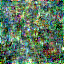

Batch 0, step 0, output 1:


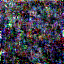

Batch 0, step 0, output 2:


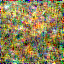

Batch 0, step 0, output 3:


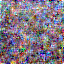

Batch 0, step 0, output 4:


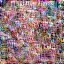

Batch 0, step 0, output 5:


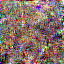

Batch 0, step 0, output 6:


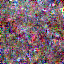

Batch 0, step 0, output 7:


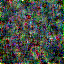

Batch 0, step 0, output 8:


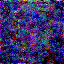

Batch 0, step 0, output 9:


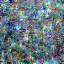

Batch 0, step 0, output 10:


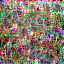

Batch 0, step 0, output 11:


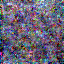

Batch 0, step 0, output 12:


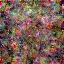

Batch 0, step 0, output 13:


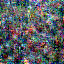

Batch 0, step 0, output 14:


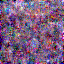

Batch 0, step 0, output 15:


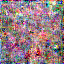


Batch 0, step 100, output 0:


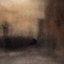

Batch 0, step 100, output 1:


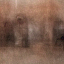

Batch 0, step 100, output 2:


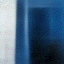

Batch 0, step 100, output 3:


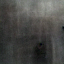

Batch 0, step 100, output 4:


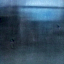

Batch 0, step 100, output 5:


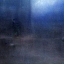

Batch 0, step 100, output 6:


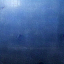

Batch 0, step 100, output 7:


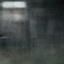

Batch 0, step 100, output 8:


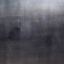

Batch 0, step 100, output 9:


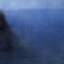

Batch 0, step 100, output 10:


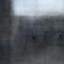

Batch 0, step 100, output 11:


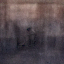

Batch 0, step 100, output 12:


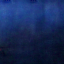

Batch 0, step 100, output 13:


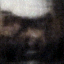

Batch 0, step 100, output 14:


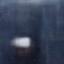

Batch 0, step 100, output 15:


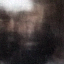


Batch 0, step 200, output 0:


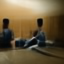

Batch 0, step 200, output 1:


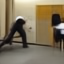

Batch 0, step 200, output 2:


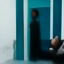

Batch 0, step 200, output 3:


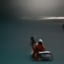

Batch 0, step 200, output 4:


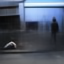

Batch 0, step 200, output 5:


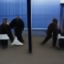

Batch 0, step 200, output 6:


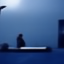

Batch 0, step 200, output 7:


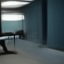

Batch 0, step 200, output 8:


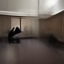

Batch 0, step 200, output 9:


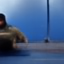

Batch 0, step 200, output 10:


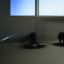

Batch 0, step 200, output 11:


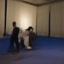

Batch 0, step 200, output 12:


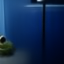

Batch 0, step 200, output 13:


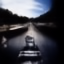

Batch 0, step 200, output 14:


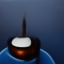

Batch 0, step 200, output 15:


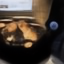


Batch 0, step 249, output 0:


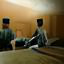

Batch 0, step 249, output 1:


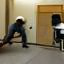

Batch 0, step 249, output 2:


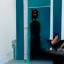

Batch 0, step 249, output 3:


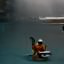

Batch 0, step 249, output 4:


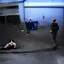

Batch 0, step 249, output 5:


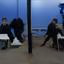

Batch 0, step 249, output 6:


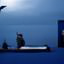

Batch 0, step 249, output 7:


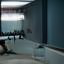

Batch 0, step 249, output 8:


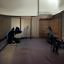

Batch 0, step 249, output 9:


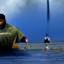

Batch 0, step 249, output 10:


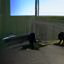

Batch 0, step 249, output 11:


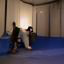

Batch 0, step 249, output 12:


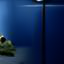

Batch 0, step 249, output 13:


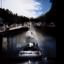

Batch 0, step 249, output 14:


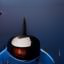

Batch 0, step 249, output 15:


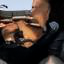

In [6]:
def do_run():
    if seed is not None:
        torch.manual_seed(seed)

    make_cutouts = MakeCutouts(clip_size, cutn)
    side_x = side_y = model_config['image_size']

    target_embeds, weights = [], []

    for prompt in prompts:
        txt, weight = parse_prompt(prompt)
        target_embeds.append(clip_model.encode_text(clip.tokenize(txt).to(device)).float())
        weights.append(weight)

    for prompt in image_prompts:
        path, weight = parse_prompt(prompt)
        img = Image.open(fetch(path)).convert('RGB')
        img = TF.resize(img, min(side_x, side_y, *img.size), transforms.InterpolationMode.LANCZOS)
        batch = make_cutouts(TF.to_tensor(img).unsqueeze(0).to(device))
        embed = clip_model.encode_image(normalize(batch)).float()
        target_embeds.append(embed)
        weights.extend([weight / cutn] * cutn)

    target_embeds = torch.cat(target_embeds)
    weights = torch.tensor(weights, device=device)
    if weights.sum().abs() < 1e-3:
        raise RuntimeError('The weights must not sum to 0.')
    weights /= weights.sum().abs()

    init = None
    if init_image is not None:
        init = Image.open(fetch(init_image)).convert('RGB')
        init = init.resize((side_x, side_y), Image.LANCZOS)
        init = TF.to_tensor(init).to(device).unsqueeze(0).mul(2).sub(1)

    cur_t = None

    def cond_fn(x, t, out, y=None):
        n = x.shape[0]
        fac = diffusion.sqrt_one_minus_alphas_cumprod[cur_t]
        x_in = out['pred_xstart'] * fac + x * (1 - fac)
        clip_in = normalize(make_cutouts(x_in.add(1).div(2)))
        image_embeds = clip_model.encode_image(clip_in).float()
        dists = spherical_dist_loss(image_embeds.unsqueeze(1), target_embeds.unsqueeze(0))
        dists = dists.view([cutn, n, -1])
        losses = dists.mul(weights).sum(2).mean(0)
        tv_losses = tv_loss(x_in)
        range_losses = range_loss(out['pred_xstart'])
        loss = losses.sum() * clip_guidance_scale + tv_losses.sum() * tv_scale + range_losses.sum() * range_scale
        if init is not None and init_scale:
            init_losses = lpips_model(x_in, init)
            loss = loss + init_losses.sum() * init_scale
        return -torch.autograd.grad(loss, x)[0]

    if model_config['timestep_respacing'].startswith('ddim'):
        sample_fn = diffusion.ddim_sample_loop_progressive
    else:
        sample_fn = diffusion.p_sample_loop_progressive

    for i in range(n_batches):
        cur_t = diffusion.num_timesteps - skip_timesteps - 1

        samples = sample_fn(
            model,
            (batch_size, 3, side_y, side_x),
            clip_denoised=False,
            model_kwargs={},
            cond_fn=cond_fn,
            progress=True,
            skip_timesteps=skip_timesteps,
            init_image=init,
            randomize_class=True,
            cond_fn_with_grad=True,
        )

        for j, sample in enumerate(samples):
            cur_t -= 1
            if j % 100 == 0 or cur_t == -1:
                print()
                for k, image in enumerate(sample['pred_xstart']):
                    filename = f'progress_{i * batch_size + k:05}.png'
                    TF.to_pil_image(image.add(1).div(2).clamp(0, 1)).save(filename)
                    tqdm.write(f'Batch {i}, step {j}, output {k}:')
                    display.display(display.Image(filename))

gc.collect()
do_run()